### import

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

In [ ]:
import datetime
from datetime import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [ ]:
pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
from linearmodels.panel import PanelOLS
from linearmodels.datasets import wage_panel
import statsmodels.api as sm
from linearmodels.panel import PooledOLS

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

In [ ]:
import scipy
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from scipy.stats import mstats
from scipy.stats import ttest_ind

In [ ]:
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

### functions

In [ ]:
# percentile function
def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    percentile_.__name__ = '{:02.0f}%'.format(n*100)
    return percentile_

In [ ]:
def str_2_float_nan(list_a):
  offer_price_list = []
  for price in [str(price).replace(",", "") for price in list_a]:
    try:
      tempt_1 = float(price)
      offer_price_list.append(tempt_1)
    except:
      tempt_2 = None
      offer_price_list.append(tempt_2)
  return offer_price_list

In [ ]:
# this is the widorize function .transform(winsorize_series)
def winsorize_series(group):
    return mstats.winsorize(group, limits=[0.01,0.01])

In [ ]:
# ols summary to datatframe function
def model2df(mod):
  data = {'coef': mod.params,
          'P_value': mod.pvalues}
  df = pd.DataFrame(data).round(3)

  star_l=[]
  for i, p in enumerate(df.P_value):
    if p < 0.01:
      star_l.append(str(df.coef.iloc[i])+'***')
    elif p < 0.05:
      star_l.append(str(df.coef.iloc[i])+'**')
    elif p < 0.1:
      star_l.append(str(df.coef.iloc[i])+'*')
    else:
      star_l.append(str(df.coef.iloc[i]))
  df['coef'] = star_l
  # df = df.drop('P_value',axis=1)
  return df

### data

In [ ]:
# final_sdc_vd_sic_lret_ind_ret = pd.read_csv('https://utexas.box.com/shared/static/cu6px9tcvubojte0haol72xxt976lmol.csv').drop('Unnamed: 0',axis=1)
final_sdc_vd_sic_lret_ind_ret = pd.read_csv('/content/drive/MyDrive/UT_research/VC_IB/code2/results/final_sdc_vd_sic_lret_ind_ret_231213.csv').drop('Unnamed: 0',axis=1)

<ipython-input-258-e637edd8d614>:2: DtypeWarning: Columns (30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  final_sdc_vd_sic_lret_ind_ret = pd.read_csv('/content/drive/MyDrive/UT_research/VC_IB/code2/results/final_sdc_vd_sic_lret_ind_ret_231213.csv').drop('Unnamed: 0',axis=1)


In [ ]:
final_sdc_vd_regg_df = final_sdc_vd_sic_lret_ind_ret.copy()
final_sdc_vd_regg_df.head()

,jkl_index,deal_number,filing_date,issue_date,issuer,main_sic_code,nation,lead_underwriter_code,all_managers,all_mgr_role_code,...,IB_fixed_legg mason wood walker,IB_fixed_national us,IB_fixed_adams harkness hill,IB_fixed_simmons energy,IB_fixed_bancamerica robertson stephen,IB_fixed_aegis capital,IB_fixed_furman selz,IB_fixed_jc bradford,IB_fixed_wessels arnold henderson ll,IB_fixed_pacific growth equities
0,5,452914002.0,1994-09-19,1995-01-10,DiaSys Corp,3841,UnitedStates,TASIN,Tasin & Company,BM,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21,446418002.0,1994-10-20,1995-01-12,SunPharm Corp,2834,UnitedStates,ROYCE-INVEST,Royce Investment Group Inc,BM,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,445593002.0,1994-10-13,1995-01-18,California Pro Sports Inc,5091,UnitedStates,COHIG,Cohig & Associates,BM,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,446052002.0,1994-09-14,1995-01-18,Infosafe Systems Inc,7372,UnitedStates,D-H-BLAIR,D. H. Blair,BM,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,446382002.0,1994-10-18,1995-01-18,Timeline Inc,7372,UnitedStates,T-JAMES,Thomas James Associates,BM,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_sdc_vd_regg_df.columns[:73]

Index(['jkl_index', 'deal_number', 'filing_date', 'issue_date', 'issuer',
       'main_sic_code', 'nation', 'lead_underwriter_code', 'all_managers',
       'all_mgr_role_code', 'lead_underwriter', 'cusip', 'cusip9',
       'lead_underwriter_list', 'JB_JL_jointlead', 'CM_CL_comanager',
       'gross_spread_($)', 'manage_ment_fee_($)', 'under_writing_fee_($)',
       'selling_conces_sion_($)', 're_allow_ance_fee_($)',
       'gross_spread_in_this_mkt_($_mil)', 'principal_amount_($_mil)',
       'proceeds_amt_in_this_mkt_($_mil)', 'offer_price', 'type_of_security',
       'description', 'marketplace',
       'primary_exchange_where_issue_will_be_listed', 'HFILE', 'LFILE',
       'original_middle_of_filing_price_range', 'shares_filed_in_this_mkt',
       'amt_filed_in_this_mkt_($_mil)', 'reit_type_code', 'depos_itary',
       'unit_inv._trust', 'closed_end_fund/trust_flag_(y/n)',
       'gross_spread_as_%_of_prncpl_amt_in_this_mkt', 'AH_LFILE', 'AH_HFILE',
       'change_in_value_of_shares

In [ ]:
final_sdc_vd_regg_df.columns[73:173]

Index(['l_prc_7', 'l_prc_30', 'l_prc_91', 'l_prc_155', 'l_prc_156',
       'l_prc_157', 'l_prc_158', 'l_prc_159', 'l_prc_160', 'l_prc_161',
       'l_prc_162', 'l_prc_163', 'l_prc_164', 'l_prc_165', 'l_prc_166',
       'l_prc_167', 'l_prc_168', 'l_prc_169', 'l_prc_170', 'l_prc_171',
       'l_prc_172', 'l_prc_173', 'l_prc_174', 'l_prc_175', 'l_prc_176',
       'l_prc_177', 'l_prc_178', 'l_prc_179', 'l_prc_180', 'l_prc_181',
       'l_prc_182', 'l_prc_183', 'l_prc_184', 'l_prc_185', 'l_prc_186',
       'l_prc_187', 'l_prc_188', 'l_prc_189', 'l_prc_190', 'l_prc_191',
       'l_prc_192', 'l_prc_193', 'l_prc_194', 'l_prc_195', 'l_prc_196',
       'l_prc_197', 'l_prc_198', 'l_prc_199', 'l_prc_200', 'l_prc_201',
       'l_prc_202', 'l_prc_203', 'l_prc_204', 'l_prc_365', 'l_prc_1095',
       'l_ret_7', 'l_ret_30', 'l_ret_91', 'l_ret_155', 'l_ret_156',
       'l_ret_157', 'l_ret_158', 'l_ret_159', 'l_ret_160', 'l_ret_161',
       'l_ret_162', 'l_ret_163', 'l_ret_164', 'l_ret_165', 'l_ret_166',

In [ ]:
final_sdc_vd_regg_df.columns[173:240]

Index(['l_ret_197', 'l_ret_198', 'l_ret_199', 'l_ret_200', 'l_ret_201',
       'l_ret_202', 'l_ret_203', 'l_ret_204', 'l_ret_365', 'l_ret_1095',
       'sic3', 'ind_ret_155', 'ind_ret_156', 'ind_ret_157', 'ind_ret_158',
       'ind_ret_159', 'ind_ret_160', 'ind_ret_161', 'ind_ret_162',
       'ind_ret_163', 'ind_ret_164', 'ind_ret_165', 'ind_ret_166',
       'ind_ret_167', 'ind_ret_168', 'ind_ret_169', 'ind_ret_170',
       'ind_ret_171', 'ind_ret_172', 'ind_ret_173', 'ind_ret_174',
       'ind_ret_175', 'ind_ret_176', 'ind_ret_177', 'ind_ret_178',
       'ind_ret_179', 'ind_ret_180', 'ind_ret_181', 'ind_ret_182',
       'ind_ret_183', 'ind_ret_184', 'ind_ret_185', 'ind_ret_186',
       'ind_ret_187', 'ind_ret_188', 'ind_ret_189', 'ind_ret_190',
       'ind_ret_191', 'ind_ret_192', 'ind_ret_193', 'ind_ret_194',
       'ind_ret_195', 'ind_ret_196', 'ind_ret_197', 'ind_ret_198',
       'ind_ret_199', 'ind_ret_200', 'ind_ret_201', 'ind_ret_202',
       'ind_ret_203', 'ind_ret_204', 'ind_r

In [ ]:
final_sdc_vd_regg_df.columns[240:340]

Index(['IB_fixed_goldman sachs', 'IB_fixed_jp morgan',
       'IB_fixed_morgan stanley', 'IB_fixed_william blair',
       'IB_fixed_merrill lynch', 'IB_fixed_cowen', 'IB_fixed_jefferies',
       'IB_fixed_lehman brothers', 'IB_fixed_deutsche bank',
       'IB_fixed_raymond james associates in', 'IB_fixed_rbc capital markets',
       'IB_fixed_stifel nicolaus', 'IB_fixed_bear stearns',
       'IB_fixed_donaldson lufkin jenrette', 'IB_fixed_needham',
       'IB_fixed_hambrecht quist', 'IB_fixed_robert w baird',
       'IB_fixed_credit suisse usa', 'IB_fixed_piper jaffray cos',
       'IB_fixed_citigroup global markets', 'IB_fixed_wells fargo',
       'IB_fixed_jmp', 'IB_fixed_cs first boston',
       'IB_fixed_banc of america ll', 'IB_fixed_oppenheimer',
       'IB_fixed_barclays', 'IB_fixed_thomas weisel', 'IB_fixed_ubs bank',
       'IB_fixed_cibc world markets', 'IB_fixed_credit suisse',
       'IB_fixed_salomon smith barney', 'IB_fixed_bofa', 'IB_fixed_ubs',
       'IB_fixed_montgome

In [ ]:
# generate excess return
final_sdc_vd_regg_df['excess_ret_1d'] = final_sdc_vd_regg_df['initial_return'] - final_sdc_vd_regg_df['ind_ret_1']
final_sdc_vd_regg_df['excess_ret_1w'] = final_sdc_vd_regg_df['l_ret_7'] - final_sdc_vd_regg_df['ind_ret_7']
final_sdc_vd_regg_df['excess_ret_1m'] = final_sdc_vd_regg_df['l_ret_30'] - final_sdc_vd_regg_df['ind_ret_30']
final_sdc_vd_regg_df['excess_ret_3m'] = final_sdc_vd_regg_df['l_ret_91'] - final_sdc_vd_regg_df['ind_ret_91']
final_sdc_vd_regg_df['excess_ret_1y'] = final_sdc_vd_regg_df['l_ret_365'] - final_sdc_vd_regg_df['ind_ret_365']
final_sdc_vd_regg_df['excess_ret_3y'] = final_sdc_vd_regg_df['l_ret_1095'] - final_sdc_vd_regg_df['ind_ret_1095']

In [ ]:
# excess return for 180 days
# excess return for 180 days
d_list3 = [155, 156,157,158,159,160,161,162,163,164,
           165, 166,167,168,169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
           180, 181,182,183,184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
           195, 196,197,198,199, 200, 201, 202, 203, 204]
# for loop
for dy in d_list3:
  col_name1 = 'excess_ret_{}d'.format(dy)
  col_name2 = 'l_ret_{}'.format(dy)
  col_name3 = 'ind_ret_{}'.format(dy)
  final_sdc_vd_regg_df[col_name1] = final_sdc_vd_regg_df[col_name2] - final_sdc_vd_regg_df[col_name3]

In [ ]:
# real 180 before return and excess return
final_sdc_vd_regg_df['l_ret_179_b'] = final_sdc_vd_regg_df['l_ret_179'].fillna(final_sdc_vd_regg_df['l_ret_178']).fillna(final_sdc_vd_regg_df['l_ret_177']).fillna(final_sdc_vd_regg_df['l_ret_176'])
final_sdc_vd_regg_df['excess_ret_179_b'] = final_sdc_vd_regg_df['excess_ret_179d'].fillna(final_sdc_vd_regg_df['excess_ret_178d']).fillna(final_sdc_vd_regg_df['excess_ret_177d']).fillna(final_sdc_vd_regg_df['excess_ret_176d'])
# real 180 excess return
final_sdc_vd_regg_df['l_ret_181_a'] = final_sdc_vd_regg_df['l_ret_181'].fillna(final_sdc_vd_regg_df['l_ret_182']).fillna(final_sdc_vd_regg_df['l_ret_183']).fillna(final_sdc_vd_regg_df['l_ret_184'])
final_sdc_vd_regg_df['excess_ret_181_a'] = final_sdc_vd_regg_df['excess_ret_181d'].fillna(final_sdc_vd_regg_df['excess_ret_182d']).fillna(final_sdc_vd_regg_df['excess_ret_183d']).fillna(final_sdc_vd_regg_df['excess_ret_184d'])

In [ ]:
# 180 day lock up period before vs after return
final_sdc_vd_regg_df['l_ret_175_180'] = final_sdc_vd_regg_df[['l_ret_175','l_ret_176','l_ret_177','l_ret_178','l_ret_179','l_ret_180']].mean(axis='columns')
final_sdc_vd_regg_df['l_ret_181_187'] = final_sdc_vd_regg_df[['l_ret_181','l_ret_182','l_ret_183','l_ret_184','l_ret_185','l_ret_186','l_ret_187']].mean(axis='columns')

final_sdc_vd_regg_df['l_ret_175_179'] = final_sdc_vd_regg_df[['l_ret_175','l_ret_176','l_ret_177','l_ret_178','l_ret_179','l_ret_180']].mean(axis='columns')
final_sdc_vd_regg_df['l_ret_180_184'] = final_sdc_vd_regg_df[['l_ret_181','l_ret_182','l_ret_183','l_ret_184','l_ret_185','l_ret_186']].mean(axis='columns')

In [ ]:
# 180 day lock up period before vs after excess return
final_sdc_vd_regg_df['ex_ret_175_180'] = final_sdc_vd_regg_df[['excess_ret_175d','excess_ret_176d','excess_ret_177d','excess_ret_178d','excess_ret_179d','excess_ret_180d']].mean(axis='columns')
final_sdc_vd_regg_df['ex_ret_181_187'] = final_sdc_vd_regg_df[['excess_ret_181d','excess_ret_182d','excess_ret_183d','excess_ret_184d','excess_ret_185d','excess_ret_186d','excess_ret_187d']].mean(axis='columns')

final_sdc_vd_regg_df['ex_ret_175_179'] = final_sdc_vd_regg_df[['excess_ret_175d','excess_ret_176d','excess_ret_177d','excess_ret_178d','excess_ret_179d']].mean(axis='columns')
final_sdc_vd_regg_df['ex_ret_180_184'] = final_sdc_vd_regg_df[['excess_ret_180d','excess_ret_181d','excess_ret_182d','excess_ret_183d','excess_ret_184d']].mean(axis='columns')

In [ ]:
# top_100_underwriter_list
top_100_underwriter_list =  list(final_sdc_vd_regg_df.columns[240:340])

In [ ]:
# real ofer price
final_sdc_vd_regg_df['offer_price_2022'] = final_sdc_vd_regg_df['offer_price'] * final_sdc_vd_regg_df['factor_2022']

In [ ]:
# float rate again
final_sdc_vd_regg_df['float_rate2'] = pd.Series(str_2_float_nan(final_sdc_vd_regg_df['offer_price'])) / pd.Series(str_2_float_nan(final_sdc_vd_regg_df['market_value_pro_forma_offer_($_mil)']))

In [ ]:
# MKTVALUEPF_PROS
final_sdc_vd_regg_df['market_value_after_offer($_mil)'] =  str_2_float_nan(final_sdc_vd_regg_df['market_value_pro_forma_offer_($_mil)'])
final_sdc_vd_regg_df['market_value_after_offer($_mil)_2022'] = final_sdc_vd_regg_df['market_value_after_offer($_mil)'] * final_sdc_vd_regg_df['factor_2022']

In [ ]:
# average return before and after 180 days
final_sdc_vd_regg_df['l_ret_175_178'] = winsorize(final_sdc_vd_regg_df[['l_ret_175','l_ret_176','l_ret_177','l_ret_178']].mean(axis='columns'),(0.01,0.01))
final_sdc_vd_regg_df['l_ret_175_177'] = winsorize(final_sdc_vd_regg_df[['l_ret_175','l_ret_176','l_ret_177']].mean(axis='columns'),(0.01,0.01))

final_sdc_vd_regg_df['l_ret_179_182'] = winsorize(final_sdc_vd_regg_df[['l_ret_179','l_ret_180','l_ret_181','l_ret_182']].mean(axis='columns'),(0.01,0.01))
final_sdc_vd_regg_df['l_ret_179_186'] = winsorize(final_sdc_vd_regg_df[['l_ret_179','l_ret_180','l_ret_181','l_ret_182','l_ret_183','l_ret_184','l_ret_185','l_ret_186']].mean(axis='columns'),(0.05,0.05))
final_sdc_vd_regg_df['l_ret_178_183'] = winsorize(final_sdc_vd_regg_df[['l_ret_178','l_ret_179','l_ret_180','l_ret_181','l_ret_182','l_ret_183']].mean(axis='columns'),(0.01,0.01))

# average excess return before and after 180 days
final_sdc_vd_regg_df['ex_ret_175_178'] = winsorize(final_sdc_vd_regg_df[['excess_ret_175d','excess_ret_176d','excess_ret_177d','excess_ret_178d']].mean(axis='columns'),(0.01,0.01))
final_sdc_vd_regg_df['ex_ret_179_182'] = winsorize(final_sdc_vd_regg_df[['excess_ret_179d','excess_ret_180d','excess_ret_181d','excess_ret_182d']].mean(axis='columns'),(0.01,0.01))
final_sdc_vd_regg_df['ex_ret_179_186'] = winsorize(final_sdc_vd_regg_df[['excess_ret_179d','excess_ret_180d','excess_ret_181d','excess_ret_182d','excess_ret_183d',
                                                                         'excess_ret_184d','excess_ret_185d','excess_ret_186d']].mean(axis='columns'),(0.01,0.01))

In [ ]:
# 175 and 186 return
final_sdc_vd_regg_df['l_ret_175_fill'] = final_sdc_vd_regg_df['l_ret_175'].fillna(final_sdc_vd_regg_df['l_ret_176']).fillna(final_sdc_vd_regg_df['l_ret_177']).fillna(final_sdc_vd_regg_df['l_ret_178'])
final_sdc_vd_regg_df['l_ret_186_fill'] = final_sdc_vd_regg_df['l_ret_186'].fillna(final_sdc_vd_regg_df['l_ret_185']).fillna(final_sdc_vd_regg_df['l_ret_184']).fillna(final_sdc_vd_regg_df['l_ret_183'])

In [ ]:
 long_term_ret_list =['l_ret_7', 'l_ret_30','l_ret_91', 'l_ret_175', 'l_ret_176', 'l_ret_177', 'l_ret_178',
                      'l_ret_179', 'l_ret_180', 'l_ret_181', 'l_ret_182', 'l_ret_183',
                      'l_ret_184', 'l_ret_185', 'l_ret_186', 'l_ret_187', 'l_ret_365', 'l_ret_1095']

#### for diff in diff

In [ ]:
# 180 day lock up period before vs after return
final_sdc_vd_regg_df['l_ret_160_170'] = final_sdc_vd_regg_df[['l_ret_160','l_ret_161','l_ret_162','l_ret_163','l_ret_164',
                                                              'l_ret_165','l_ret_166','l_ret_167','l_ret_168','l_ret_169','l_ret_170']].mean(axis='columns')
final_sdc_vd_regg_df['l_ret_190_200'] = final_sdc_vd_regg_df[['l_ret_190','l_ret_191','l_ret_192','l_ret_193','l_ret_194','l_ret_195',
                                                              'l_ret_196','l_ret_197','l_ret_198','l_ret_199','l_ret_200']].mean(axis='columns')

In [ ]:
# 180 day lock up period before vs after excess return
final_sdc_vd_regg_df['ex_ret_160_170'] = final_sdc_vd_regg_df[['excess_ret_160d','excess_ret_161d','excess_ret_162d','excess_ret_163d','excess_ret_164d',
                                                               'excess_ret_165d','excess_ret_166d','excess_ret_167d','excess_ret_168d','excess_ret_169d','excess_ret_170d']].mean(axis='columns')
final_sdc_vd_regg_df['ex_ret_190_200'] = final_sdc_vd_regg_df[['excess_ret_190d','excess_ret_191d','excess_ret_192d','excess_ret_193d','excess_ret_194d',
                                                               'excess_ret_195d','excess_ret_196d','excess_ret_197d','excess_ret_198d','excess_ret_199d','excess_ret_200d']].mean(axis='columns')

#### winsor

In [ ]:
print(list(final_sdc_vd_regg_df.columns[340:]))

['excess_ret_1d', 'excess_ret_1w', 'excess_ret_1m', 'excess_ret_3m', 'excess_ret_1y', 'excess_ret_3y', 'excess_ret_155d', 'excess_ret_156d', 'excess_ret_157d', 'excess_ret_158d', 'excess_ret_159d', 'excess_ret_160d', 'excess_ret_161d', 'excess_ret_162d', 'excess_ret_163d', 'excess_ret_164d', 'excess_ret_165d', 'excess_ret_166d', 'excess_ret_167d', 'excess_ret_168d', 'excess_ret_169d', 'excess_ret_170d', 'excess_ret_171d', 'excess_ret_172d', 'excess_ret_173d', 'excess_ret_174d', 'excess_ret_175d', 'excess_ret_176d', 'excess_ret_177d', 'excess_ret_178d', 'excess_ret_179d', 'excess_ret_180d', 'excess_ret_181d', 'excess_ret_182d', 'excess_ret_183d', 'excess_ret_184d', 'excess_ret_185d', 'excess_ret_186d', 'excess_ret_187d', 'excess_ret_188d', 'excess_ret_189d', 'excess_ret_190d', 'excess_ret_191d', 'excess_ret_192d', 'excess_ret_193d', 'excess_ret_194d', 'excess_ret_195d', 'excess_ret_196d', 'excess_ret_197d', 'excess_ret_198d', 'excess_ret_199d', 'excess_ret_200d', 'excess_ret_201d', 'exc

In [ ]:
# winsorize longterm returns
final_sdc_vd_regg_df[long_term_ret_list + list(final_sdc_vd_regg_df.columns[340:])] = final_sdc_vd_regg_df[long_term_ret_list + list(final_sdc_vd_regg_df.columns[340:])].transform(winsorize_series)

# 1. Regression

## 1.1. Statistics

### Table 1.
Characteristics of the investment banking relationship:

In [ ]:
final_sdc_vd_regg_df.udwr_any_aff_by_deal.value_counts()

0    5494
1     104
Name: udwr_any_aff_by_deal, dtype: int64

In [ ]:
final_sdc_vd_regg_df.udwr_lead_aff_by_deal.value_counts()

0    5510
1      88
Name: udwr_lead_aff_by_deal, dtype: int64

In [ ]:
final_sdc_vd_regg_df.pe_vc_backed.value_counts()

0    4359
1    1239
Name: pe_vc_backed, dtype: int64

In [ ]:
final_sdc_vd_regg_df.venture_backed.value_counts()

No     3289
Yes    2309
Name: venture_backed, dtype: int64

### Table 2. Characteristics of IPO prices and market valuations
MKTVALUEPF_PROS

In [ ]:
# inflation deflated
f_c_list3 = ['offer_price_2022','Proceeds_2022','market_value_after_offer($_mil)_2022','float_rate2','udwr_any_aff_by_deal']
sdc_table_df5 = final_sdc_vd_regg_df.loc[:,f_c_list3]

In [ ]:
sdc_table_table4_1 = sdc_table_df5.agg(['count','mean','std', percentile(0.1),percentile(0.25),percentile(0.5),percentile(0.75),percentile(0.9)]).T.round(2)
sdc_table_table4_1

,count,mean,std,10%,25%,50%,75%,90%
offer_price_2022,5598.0,19.67,8.75,8.66,13.43,19.04,24.43,30.08
Proceeds_2022,5598.0,227.50,1086.93,15.98,42.83,85.78,174.70,384.97
market_value_after_offer($_mil)_2022,4888.0,2905.35,56843.94,60.12,150.72,357.06,848.44,2320.10
float_rate2,4888.0,0.08,0.10,0.01,0.02,0.05,0.10,0.20
udwr_any_aff_by_deal,5598.0,0.02,0.14,0.00,0.00,0.00,0.00,0.00


In [ ]:
sdc_table_df2 =  sdc_table_df5.groupby('udwr_any_aff_by_deal').agg(['mean','median']).round(2).T
sdc_table_df2

udwr_any_aff_by_deal                               0        1
offer_price_2022                     mean      19.63    21.63
                                     median    19.04    18.87
Proceeds_2022                        mean     223.27   450.58
                                     median    84.94   149.36
market_value_after_offer($_mil)_2022 mean    2899.68  3179.31
                                     median   351.26   660.82
float_rate2                          mean       0.09     0.03
                                     median     0.05     0.03

In [ ]:
sdc_table_df2.to_latex()

<ipython-input-198-a91a857d6076>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  sdc_table_df2.to_latex()


'\\begin{tabular}{llrr}\n\\toprule\n            & udwr\\_any\\_aff\\_by\\_deal &        0 &        1 \\\\\n\\midrule\noffer\\_price\\_2022 & mean &    19.63 &    21.63 \\\\\n            & median &    19.04 &    18.87 \\\\\nProceeds\\_2022 & mean &   223.27 &   450.58 \\\\\n            & median &    84.94 &   149.36 \\\\\nmarket\\_value\\_after\\_offer(\\$\\_mil)\\_2022 & mean &  2899.68 &  3179.31 \\\\\n            & median &   351.26 &   660.82 \\\\\nfloat\\_rate2 & mean &     0.09 &     0.03 \\\\\n            & median &     0.05 &     0.03 \\\\\n\\bottomrule\n\\end{tabular}\n'

### Table 3. Mean comparison of returns by affiliation

#### regular return mean comparision

In [ ]:
# t-test
# any
ttest_df = final_sdc_vd_regg_df.copy()
non_aff_ipo_df = ttest_df[ttest_df['udwr_any_aff_by_deal']==0]
aff_ipo_df = ttest_df[ttest_df['udwr_any_aff_by_deal']==1]
# lead
l_non_aff_ipo_df = ttest_df[ttest_df['udwr_lead_aff_by_deal']==0]
l_aff_ipo_df = ttest_df[ttest_df['udwr_lead_aff_by_deal']==1]

In [ ]:
def mean_comp_t(ret,aff):
  temp_df = pd.DataFrame(ttest_df.groupby([aff])[ret].mean())

  non_aff_ipo_df = ttest_df[ttest_df[aff]==0]
  aff_ipo_df = ttest_df[ttest_df[aff]==1]

  t_score = ttest_ind(aff_ipo_df[ret].dropna(), non_aff_ipo_df[ret].dropna())
  return temp_df.iloc[0][0], temp_df.iloc[1][0], t_score[0]

In [ ]:
return_list = ['initial_return','l_ret_7', 'l_ret_30', 'l_ret_91', 'l_ret_179', 'l_ret_180',
               'l_ret_181','l_ret_365', 'l_ret_1095']
# any affiliation
ttest__aff_any = np.zeros((3, len(return_list)))
ttest__aff_any = pd.DataFrame(ttest__aff_any)
ttest__aff_any.columns = return_list
ttest__aff_any.index = ['no_affilliation','affilliation', 't_score']
ttest__aff_any.shape

(3, 9)

In [ ]:
for ret in return_list:
  tempt_dict = mean_comp_t(ret,'udwr_any_aff_by_deal')
  ttest__aff_any.loc['no_affilliation',ret] = tempt_dict[0]
  ttest__aff_any.loc['affilliation',ret] = tempt_dict[1]
  ttest__aff_any.loc['t_score',ret] = tempt_dict[2]

In [ ]:
# any affiliation
ttest__aff_any.round(3)

,initial_return,l_ret_7,l_ret_30,l_ret_91,l_ret_179,l_ret_180,l_ret_181,l_ret_365,l_ret_1095
no_affilliation,0.262,0.280,0.291,0.334,0.296,0.266,0.243,0.179,0.170
affilliation,0.334,0.341,0.384,0.384,0.136,0.207,0.190,0.203,0.931
t_score,0.401,0.933,1.498,0.545,-1.048,-0.556,-0.580,0.255,4.282


In [ ]:
ttest__aff_any.round(3).to_latex()

<ipython-input-204-48a9f37d3b85>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ttest__aff_any.round(3).to_latex()


'\\begin{tabular}{lrrrrrrrrr}\n\\toprule\n{} &  initial\\_return &  l\\_ret\\_7 &  l\\_ret\\_30 &  l\\_ret\\_91 &  l\\_ret\\_179 &  l\\_ret\\_180 &  l\\_ret\\_181 &  l\\_ret\\_365 &  l\\_ret\\_1095 \\\\\n\\midrule\nno\\_affilliation &           0.262 &    0.280 &     0.291 &     0.334 &      0.296 &      0.266 &      0.243 &      0.179 &       0.170 \\\\\naffilliation    &           0.334 &    0.341 &     0.384 &     0.384 &      0.136 &      0.207 &      0.190 &      0.203 &       0.931 \\\\\nt\\_score         &           0.401 &    0.933 &     1.498 &     0.545 &     -1.048 &     -0.556 &     -0.580 &      0.255 &       4.282 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
# lead affiliation
ttest__aff_l = np.zeros((3, len(return_list)))
ttest__aff_l = pd.DataFrame(ttest__aff_l)
ttest__aff_l.columns = return_list
ttest__aff_l.index = ['no_affilliation','affilliation', 't_score']
ttest__aff_l.shape

(3, 9)

In [ ]:
# lead affiliation
for ret in return_list:
  tempt_dict = mean_comp_t(ret,'udwr_lead_aff_by_deal')
  ttest__aff_l.loc['no_affilliation',ret] = tempt_dict[0]
  ttest__aff_l.loc['affilliation',ret] = tempt_dict[1]
  ttest__aff_l.loc['t_score',ret] = tempt_dict[2]

In [ ]:
ttest__aff_l.round(3)

,initial_return,l_ret_7,l_ret_30,l_ret_91,l_ret_179,l_ret_180,l_ret_181,l_ret_365,l_ret_1095
no_affilliation,0.262,0.279,0.291,0.335,0.295,0.265,0.242,0.178,0.170
affilliation,0.362,0.375,0.404,0.379,0.197,0.247,0.237,0.228,1.118
t_score,0.515,1.357,1.677,0.451,-0.572,-0.154,-0.043,0.471,4.850


In [ ]:
ttest__aff_l.round(3).to_latex()

<ipython-input-208-b9e7f99f39ff>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ttest__aff_l.round(3).to_latex()


'\\begin{tabular}{lrrrrrrrrr}\n\\toprule\n{} &  initial\\_return &  l\\_ret\\_7 &  l\\_ret\\_30 &  l\\_ret\\_91 &  l\\_ret\\_179 &  l\\_ret\\_180 &  l\\_ret\\_181 &  l\\_ret\\_365 &  l\\_ret\\_1095 \\\\\n\\midrule\nno\\_affilliation &           0.262 &    0.279 &     0.291 &     0.335 &      0.295 &      0.265 &      0.242 &      0.178 &       0.170 \\\\\naffilliation    &           0.362 &    0.375 &     0.404 &     0.379 &      0.197 &      0.247 &      0.237 &      0.228 &       1.118 \\\\\nt\\_score         &           0.515 &    1.357 &     1.677 &     0.451 &     -0.572 &     -0.154 &     -0.043 &      0.471 &       4.850 \\\\\n\\bottomrule\n\\end{tabular}\n'

#### excess return mean comparision

In [ ]:
ex_return_list = ['excess_ret_1d','excess_ret_1w', 'excess_ret_1m', 'excess_ret_3m','excess_ret_179d','excess_ret_180d',
                  'excess_ret_181d', 'excess_ret_1y', 'excess_ret_3y']

# any affiliation
ttest__aff_any = np.zeros((3, len(ex_return_list)))
ttest__aff_any = pd.DataFrame(ttest__aff_any)
ttest__aff_any.columns = ex_return_list
ttest__aff_any.index = ['no_affilliation','affilliation', 't_score']
ttest__aff_any.shape

(3, 9)

In [ ]:
for ret in ex_return_list:
  tempt_dict = mean_comp_t(ret,'udwr_any_aff_by_deal')
  ttest__aff_any.loc['no_affilliation',ret] = tempt_dict[0]
  ttest__aff_any.loc['affilliation',ret] = tempt_dict[1]
  ttest__aff_any.loc['t_score',ret] = tempt_dict[2]

In [ ]:
# any affiliation
ttest__aff_any.round(3)

,excess_ret_1d,excess_ret_1w,excess_ret_1m,excess_ret_3m,excess_ret_179d,excess_ret_180d,excess_ret_181d,excess_ret_1y,excess_ret_3y
no_affilliation,0.262,0.234,0.260,0.242,0.148,0.125,0.100,-0.111,-0.981
affilliation,0.331,0.329,0.352,0.314,0.003,0.078,0.062,-0.008,0.075
t_score,0.374,1.851,1.477,0.833,-1.011,-0.475,-0.455,1.133,4.786


In [ ]:
# lead affiliation
ttest__aff_l = np.zeros((3, len(ex_return_list)))
ttest__aff_l = pd.DataFrame(ttest__aff_l)
ttest__aff_l.columns = ex_return_list
ttest__aff_l.index = ['no_affilliation','affilliation', 't_score']
ttest__aff_l.shape

(3, 9)

In [ ]:
# lead affiliation
for ret in ex_return_list:
  tempt_dict = mean_comp_t(ret,'udwr_lead_aff_by_deal')
  ttest__aff_l.loc['no_affilliation',ret] = tempt_dict[0]
  ttest__aff_l.loc['affilliation',ret] = tempt_dict[1]
  ttest__aff_l.loc['t_score',ret] = tempt_dict[2]

In [ ]:
ttest__aff_l.round(3)

,excess_ret_1d,excess_ret_1w,excess_ret_1m,excess_ret_3m,excess_ret_179d,excess_ret_180d,excess_ret_181d,excess_ret_1y,excess_ret_3y
no_affilliation,0.261,0.234,0.260,0.243,0.147,0.124,0.099,-0.111,-0.980
affilliation,0.358,0.361,0.373,0.315,0.073,0.130,0.117,0.039,0.226
t_score,0.480,2.289,1.685,0.773,-0.457,0.057,0.196,1.518,4.962


### Table 4. Initial and Long term IPO performance

In [ ]:
f_c_list1 = ['initial_return','l_ret_7', 'l_ret_30', 'l_ret_91', 'l_ret_175_180','l_ret_181_187','l_ret_365', 'l_ret_1095',
              'excess_ret_1d', 'excess_ret_1w', 'excess_ret_1m', 'excess_ret_3m','ex_ret_175_180','ex_ret_181_187',
              'excess_ret_1y', 'excess_ret_3y','udwr_any_aff_by_deal']

sdc_table_df1 = final_sdc_vd_regg_df.loc[:,f_c_list1]
sdc_table_df1

,initial_return,l_ret_7,l_ret_30,l_ret_91,l_ret_175_180,l_ret_181_187,l_ret_365,l_ret_1095,excess_ret_1d,excess_ret_1w,excess_ret_1m,excess_ret_3m,ex_ret_175_180,ex_ret_181_187,excess_ret_1y,excess_ret_3y,udwr_any_aff_by_deal
0,0.137500,0.200000,0.162500,0.150000,0.258333,0.257500,0.400000,0.250000,0.138916,0.177596,0.076755,-0.075506,-0.079790,-0.081308,-0.232338,-1.777903,0
1,0.071429,0.035714,0.000000,0.089286,0.111607,0.096429,0.071429,-0.357143,0.068762,0.016446,-0.078452,-0.081067,-0.161941,-0.202519,-0.651748,-3.022299,0
2,0.000000,0.013889,0.138889,0.041667,-0.222222,-0.236111,-0.125000,-0.694444,0.026047,0.027471,0.128312,-0.127240,-0.620498,-0.606066,-0.720072,-1.992094,0
3,0.050000,0.000000,0.000000,0.425000,0.500000,0.477500,0.300000,-0.725000,0.056790,0.035438,-0.002669,0.312223,0.070586,0.093350,-0.241827,-3.512948,0
4,-0.150000,-0.137500,-0.175000,-0.300000,0.225000,0.125000,-0.125000,NaN,-0.143644,-0.102483,-0.178107,-0.413263,-0.205039,-0.259755,-0.667501,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,-0.092308,-0.207692,-0.494792,6.411765,NaN,NaN,NaN,NaN,-0.091925,-0.217760,-0.505180,NaN,NaN,NaN,NaN,NaN,0
5594,0.331200,0.000800,0.000800,6.411765,NaN,NaN,NaN,NaN,0.306811,0.012046,0.032202,NaN,NaN,NaN,NaN,NaN,0
5595,0.053333,-0.166667,3.841667,6.411765,NaN,NaN,NaN,NaN,NaN,-0.182211,NaN,NaN,NaN,NaN,NaN,NaN,0
5596,-0.180870,-0.348000,3.841667,6.411765,NaN,NaN,NaN,NaN,-0.184654,-0.366525,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
sdc_table_table1_1 = sdc_table_df1.agg(['count','std','mean', percentile(0.25),percentile(0.5),percentile(0.75)]).T.round(3)
sdc_table_table1_1

,count,std,mean,25%,50%,75%
initial_return,5598.0,1.810,0.263,0.000,0.103,0.290
l_ret_7,5598.0,0.658,0.281,0.000,0.105,0.330
l_ret_30,5598.0,0.627,0.293,-0.025,0.136,0.400
l_ret_91,5598.0,0.925,0.335,-0.125,0.129,0.494
l_ret_175_180,5542.0,0.969,0.270,-0.233,0.103,0.481
l_ret_181_187,5540.0,0.905,0.248,-0.243,0.090,0.471
l_ret_365,5423.0,0.971,0.179,-0.448,-0.020,0.517
l_ret_1095,3841.0,1.444,0.183,-0.682,-0.250,0.566
excess_ret_1d,5240.0,1.865,0.263,0.003,0.102,0.293
excess_ret_1w,5276.0,0.515,0.236,-0.010,0.098,0.318


In [ ]:
table41 =sdc_table_df1.groupby('udwr_any_aff_by_deal').get_group(1).drop('udwr_any_aff_by_deal',axis=1).agg(['count','std','mean','median']).T.round(3)
table41

,count,std,mean,median
initial_return,104.0,0.433,0.334,0.229
l_ret_7,104.0,0.438,0.341,0.214
l_ret_30,104.0,0.522,0.384,0.274
l_ret_91,104.0,0.684,0.384,0.239
l_ret_175_180,104.0,0.568,0.212,0.101
l_ret_181_187,104.0,0.538,0.171,0.102
l_ret_365,103.0,0.863,0.203,0.040
l_ret_1095,67.0,2.221,0.931,0.301
excess_ret_1d,104.0,0.430,0.331,0.225
excess_ret_1w,104.0,0.430,0.329,0.213


In [ ]:
table42 = sdc_table_df1.groupby('udwr_any_aff_by_deal').get_group(0).drop('udwr_any_aff_by_deal',axis=1).agg(['count','std','mean','median']).T.round(3)
table42

,count,std,mean,median
initial_return,5494.0,1.826,0.262,0.100
l_ret_7,5494.0,0.662,0.280,0.104
l_ret_30,5494.0,0.629,0.291,0.135
l_ret_91,5494.0,0.929,0.334,0.128
l_ret_175_180,5438.0,0.975,0.271,0.103
l_ret_181_187,5436.0,0.910,0.250,0.090
l_ret_365,5320.0,0.973,0.179,-0.023
l_ret_1095,3774.0,1.424,0.170,-0.251
excess_ret_1d,5136.0,1.882,0.262,0.101
excess_ret_1w,5172.0,0.516,0.234,0.096


In [ ]:
table44 = pd.concat([table41, table42],axis=1)
table44

,count,std,mean,median,count,std,mean,median
initial_return,104.0,0.433,0.334,0.229,5494.0,1.826,0.262,0.100
l_ret_7,104.0,0.438,0.341,0.214,5494.0,0.662,0.280,0.104
l_ret_30,104.0,0.522,0.384,0.274,5494.0,0.629,0.291,0.135
l_ret_91,104.0,0.684,0.384,0.239,5494.0,0.929,0.334,0.128
l_ret_175_180,104.0,0.568,0.212,0.101,5438.0,0.975,0.271,0.103
l_ret_181_187,104.0,0.538,0.171,0.102,5436.0,0.910,0.250,0.090
l_ret_365,103.0,0.863,0.203,0.040,5320.0,0.973,0.179,-0.023
l_ret_1095,67.0,2.221,0.931,0.301,3774.0,1.424,0.170,-0.251
excess_ret_1d,104.0,0.430,0.331,0.225,5136.0,1.882,0.262,0.101
excess_ret_1w,104.0,0.430,0.329,0.213,5172.0,0.516,0.234,0.096


In [ ]:
table44.columns = [['Any affiliated IPO', 'Any affiliated IPO', 'Any affiliated IPO', 'Any affiliated IPO', 'Not affiliated IPO', 'Not affiliated IPO', 'Not affiliated IPO', 'Not affiliated IPO'], ['count', 'std', 'mean', 'median', 'count', 'std', 'mean', 'median']]
table44

Any affiliated IPO                      Not affiliated IPO  \
                            count    std   mean median              count   
initial_return              104.0  0.433  0.334  0.229             5494.0   
l_ret_7                     104.0  0.438  0.341  0.214             5494.0   
l_ret_30                    104.0  0.522  0.384  0.274             5494.0   
l_ret_91                    104.0  0.684  0.384  0.239             5494.0   
l_ret_175_180               104.0  0.568  0.212  0.101             5438.0   
l_ret_181_187               104.0  0.538  0.171  0.102             5436.0   
l_ret_365                   103.0  0.863  0.203  0.040             5320.0   
l_ret_1095                   67.0  2.221  0.931  0.301             3774.0   
excess_ret_1d               104.0  0.430  0.331  0.225             5136.0   
excess_ret_1w               104.0  0.430  0.329  0.213             5172.0   
excess_ret_1m               104.0  0.503  0.352  0.221             5190.0   
excess_ret_3m               104.0  0.630  0.314  0.166             5183.0   
ex_ret_175_180              104.0  0.534  0.092 -0.009             5166.0   
ex_ret_181_187              104.0  0.507  0.049 -0.034             5164.0   
excess_ret_1y               103.0  0.761 -0.008 -0.250             5052.0   
excess_ret_3y                67.0  2.280  0.075 -0.533             3579.0   

                                     
                  std   mean median  
initial_return  1.826  0.262  0.100  
l_ret_7         0.662  0.280  0.104  
l_ret_30        0.629  0.291  0.135  
l_ret_91        0.929  0.334  0.128  
l_ret_175_180   0.975  0.271  0.103  
l_ret_181_187   0.910  0.250  0.090  
l_ret_365       0.973  0.179 -0.023  
l_ret_1095      1.424  0.170 -0.251  
excess_ret_1d   1.882  0.262  0.101  
excess_ret_1w   0.516  0.234  0.096  
excess_ret_1m   0.627  0.260  0.114  
excess_ret_3m   0.874  0.242  0.073  
ex_ret_175_180  0.918  0.132 -0.010  
ex_ret_181_187  0.852  0.105 -0.026  
excess_ret_1y   0.917 -0.111 -0.237  
excess_ret_3y   1.779 -0.981 -0.875

In [ ]:
table44.to_latex()

<ipython-input-221-7aad6688902d>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table44.to_latex()


'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n{} & \\multicolumn{4}{l}{Any affiliated IPO} & \\multicolumn{4}{l}{Not affiliated IPO} \\\\\n{} &              count &    std &   mean & median &              count &    std &   mean & median \\\\\n\\midrule\ninitial\\_return &              104.0 &  0.433 &  0.334 &  0.229 &             5494.0 &  1.826 &  0.262 &  0.100 \\\\\nl\\_ret\\_7        &              104.0 &  0.438 &  0.341 &  0.214 &             5494.0 &  0.662 &  0.280 &  0.104 \\\\\nl\\_ret\\_30       &              104.0 &  0.522 &  0.384 &  0.274 &             5494.0 &  0.629 &  0.291 &  0.135 \\\\\nl\\_ret\\_91       &              104.0 &  0.684 &  0.384 &  0.239 &             5494.0 &  0.929 &  0.334 &  0.128 \\\\\nl\\_ret\\_175\\_180  &              104.0 &  0.568 &  0.212 &  0.101 &             5438.0 &  0.975 &  0.271 &  0.103 \\\\\nl\\_ret\\_181\\_187  &              104.0 &  0.538 &  0.171 &  0.102 &             5436.0 &  0.910 &  0.250 &  0.090 \\\\\nl\\_ret\\_365      &  

## 1.2. Regression

### Table 5. Regression Analysis of excess returns

$$Y_t = \beta_0 + \beta_1 \cdot UnderwriterAffiliation + \beta_2 \cdot X + + \epsilon $$

#### excess return

In [ ]:
# data restore
final_sdc_vd_regg_df2 =final_sdc_vd_regg_df.copy()
# log firm size variable
final_sdc_vd_regg_df2['lg_firm_size_at_offer'] = np.log(final_sdc_vd_regg_df2['market_value_after_offer($_mil)_2022'])

In [ ]:
# make functions
# pooled cross sectional data structure
final_sdc_vd_regg_df2.issue_year = pd.Categorical(final_sdc_vd_regg_df2.issue_year)
final_sdc_vd_regg_df2.sic3 = pd.Categorical(final_sdc_vd_regg_df2.sic3)
# date formate
final_sdc_vd_regg_df2.issue_date = pd.to_datetime(final_sdc_vd_regg_df2.issue_date)
# set index for pannel
reg_sdc_df1 = final_sdc_vd_regg_df2.set_index(["r_permno","issue_date"]).copy()

In [ ]:
# make functions year fixed effects + industry fixed effects
def reg_ret_on_affiliation2(Y, lead_any = 'udwr_any_aff_by_deal'):
  exog_vars = [lead_any,"float_rate2",'lg_firm_size_at_offer','issue_year','sic3'] + top_100_underwriter_list
  exog_df = sm.add_constant(reg_sdc_df1[exog_vars])
  exog_df[Y] = reg_sdc_df1[Y]
  exog_df_d = exog_df.dropna()

  ind_effects = exog_df_d.sic3.copy()

  exog_df_d = exog_df_d.apply(pd.to_numeric, errors='coerce')
  mod = PanelOLS(exog_df_d[Y], exog_df_d.drop([Y,'sic3'], axis=1), other_effects= ind_effects, drop_absorbed=True)
  fe_res_tempt = mod.fit()

  return fe_res_tempt.params.iloc[1], fe_res_tempt.pvalues.iloc[1]

In [ ]:
# make functions no fixed effect because I demeaned
def reg_ret_on_affiliation3(Y, lead_any = 'udwr_any_aff_by_deal'):
  exog_vars = [lead_any,"float_rate2",'lg_firm_size_at_offer'] + top_100_underwriter_list
  exog_df = sm.add_constant(reg_sdc_df1[exog_vars])
  exog_df[Y] = reg_sdc_df1[Y]
  exog_df_d = exog_df.dropna()

  exog_df_d = exog_df_d.apply(pd.to_numeric, errors='coerce')
  mod = PanelOLS(exog_df_d[Y], exog_df_d.drop(Y, axis=1), drop_absorbed=True)
  fe_res_tempt = mod.fit()

  return fe_res_tempt.params.iloc[1], fe_res_tempt.pvalues.iloc[1]

In [ ]:
excess_ret_list = ['excess_ret_1d', 'excess_ret_1w', 'excess_ret_1m', 'excess_ret_3m', 'ex_ret_175_180',"excess_ret_181_a", 'ex_ret_181_187','excess_ret_1y']

In [ ]:
reg_exret_on_affil_any = np.zeros((2, len(excess_ret_list)))
reg_exret_on_affil_any = pd.DataFrame(reg_exret_on_affil_any)
reg_exret_on_affil_any.columns = excess_ret_list
reg_exret_on_affil_any.index = ['coefficient','p_value']
reg_exret_on_affil_any

,excess_ret_1d,excess_ret_1w,excess_ret_1m,excess_ret_3m,ex_ret_175_180,excess_ret_181_a,ex_ret_181_187,excess_ret_1y
coefficient,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
p_value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for ex_ret in tqdm(excess_ret_list):
  cof,pv = reg_ret_on_affiliation3(ex_ret, 'udwr_any_aff_by_deal')

  reg_exret_on_affil_any.loc['coefficient',ex_ret] = cof
  reg_exret_on_affil_any.loc['p_value',ex_ret] = pv

100%|██████████| 8/8 [00:02<00:00,  2.96it/s]


In [ ]:
reg_exret_on_affil_any.round(3)

,excess_ret_1d,excess_ret_1w,excess_ret_1m,excess_ret_3m,ex_ret_175_180,excess_ret_181_a,ex_ret_181_187,excess_ret_1y
coefficient,0.041,0.030,0.055,-0.008,-0.083,-0.092,-0.096,-0.032
p_value,0.848,0.549,0.361,0.929,0.359,0.279,0.264,0.736


In [ ]:
reg_exret_on_affil_any.round(3).to_latex()

<ipython-input-230-6b0ec80ff873>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  reg_exret_on_affil_any.round(3).to_latex()


'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n{} &  excess\\_ret\\_1d &  excess\\_ret\\_1w &  excess\\_ret\\_1m &  excess\\_ret\\_3m &  ex\\_ret\\_175\\_180 &  excess\\_ret\\_181\\_a &  ex\\_ret\\_181\\_187 &  excess\\_ret\\_1y \\\\\n\\midrule\ncoefficient &          0.041 &          0.030 &          0.055 &         -0.008 &          -0.083 &            -0.092 &          -0.096 &         -0.032 \\\\\np\\_value     &          0.848 &          0.549 &          0.361 &          0.929 &           0.359 &             0.279 &           0.264 &          0.736 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
reg_exret_on_affil_lead = np.zeros((2, len(excess_ret_list)))
reg_exret_on_affil_lead = pd.DataFrame(reg_exret_on_affil_lead)
reg_exret_on_affil_lead.columns = excess_ret_list
reg_exret_on_affil_lead.index = ['coefficient','p_value']
reg_exret_on_affil_lead

,excess_ret_1d,excess_ret_1w,excess_ret_1m,excess_ret_3m,ex_ret_175_180,excess_ret_181_a,ex_ret_181_187,excess_ret_1y
coefficient,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
p_value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for ex_ret in tqdm(excess_ret_list):
  cof,pv = reg_ret_on_affiliation3(ex_ret, 'udwr_lead_aff_by_deal')

  reg_exret_on_affil_lead.loc['coefficient',ex_ret] = cof
  reg_exret_on_affil_lead.loc['p_value',ex_ret] = pv

100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


In [ ]:
reg_exret_on_affil_lead.round(3)

,excess_ret_1d,excess_ret_1w,excess_ret_1m,excess_ret_3m,ex_ret_175_180,excess_ret_181_a,ex_ret_181_187,excess_ret_1y
coefficient,0.070,0.063,0.085,-0.006,-0.006,-0.022,-0.02,0.006
p_value,0.759,0.252,0.193,0.952,0.952,0.814,0.83,0.952


In [ ]:
reg_exret_on_affil_lead.round(3).to_latex()

<ipython-input-234-cda6083ee0dd>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  reg_exret_on_affil_lead.round(3).to_latex()


'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n{} &  excess\\_ret\\_1d &  excess\\_ret\\_1w &  excess\\_ret\\_1m &  excess\\_ret\\_3m &  ex\\_ret\\_175\\_180 &  excess\\_ret\\_181\\_a &  ex\\_ret\\_181\\_187 &  excess\\_ret\\_1y \\\\\n\\midrule\ncoefficient &          0.070 &          0.063 &          0.085 &         -0.006 &          -0.006 &            -0.022 &           -0.02 &          0.006 \\\\\np\\_value     &          0.759 &          0.252 &          0.193 &          0.952 &           0.952 &             0.814 &            0.83 &          0.952 \\\\\n\\bottomrule\n\\end{tabular}\n'

### Table 6. Regression Analysis of normal returns

#### return

In [ ]:
# data restore
final_sdc_vd_regg_df2 =final_sdc_vd_regg_df.copy()
# log firm size variable
final_sdc_vd_regg_df2['lg_firm_size_at_offer'] = np.log2(final_sdc_vd_regg_df2['market_value_after_offer($_mil)_2022'])

In [ ]:
# make functions
# pooled cross sectional data structure
final_sdc_vd_regg_df2.issue_year = pd.Categorical(final_sdc_vd_regg_df2.issue_year)
final_sdc_vd_regg_df2.sic3 = pd.Categorical(final_sdc_vd_regg_df2.sic3)
# date formate
final_sdc_vd_regg_df2.issue_date = pd.to_datetime(final_sdc_vd_regg_df2.issue_date)
# set index for pannel
reg_sdc_df1 = final_sdc_vd_regg_df2.set_index(["r_permno","issue_date"]).copy()

In [ ]:
ret_list = ['initial_return','l_ret_7', 'l_ret_30', 'l_ret_91','l_ret_175_180','l_ret_181_a','l_ret_181_187','l_ret_365']

In [ ]:
# make functions year fixed effects + industry fixed effects
def reg_ret_on_affiliation2(Y, lead_any = 'udwr_any_aff_by_deal'):
  exog_vars = [lead_any,"float_rate2",'lg_firm_size_at_offer','issue_year','sic3'] + top_100_underwriter_list
  exog_df = sm.add_constant(reg_sdc_df1[exog_vars])
  exog_df[Y] = reg_sdc_df1[Y]
  exog_df_d = exog_df.dropna()

  ind_effects = exog_df_d.sic3.copy()

  exog_df_d = exog_df_d.apply(pd.to_numeric, errors='coerce')
  mod = PanelOLS(exog_df_d[Y], exog_df_d.drop([Y,'sic3'], axis=1), other_effects= ind_effects, drop_absorbed=True)
  fe_res_tempt = mod.fit()

  return fe_res_tempt.params.iloc[1], fe_res_tempt.pvalues.iloc[1]

In [ ]:
reg_ret_on_affil_any = np.zeros((2, len(ret_list)))
reg_ret_on_affil_any = pd.DataFrame(reg_ret_on_affil_any)
reg_ret_on_affil_any.columns = ret_list
reg_ret_on_affil_any.index = ['coefficient','p_value']
reg_ret_on_affil_any

,initial_return,l_ret_7,l_ret_30,l_ret_91,l_ret_175_180,l_ret_181_a,l_ret_181_187,l_ret_365
coefficient,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
p_value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for ret in tqdm(ret_list):
  coeff , pval =  reg_ret_on_affiliation2(ret, 'udwr_any_aff_by_deal')
  reg_ret_on_affil_any.loc['coefficient',ret] = coeff
  reg_ret_on_affil_any.loc['p_value',ret] = pval

100%|██████████| 8/8 [00:05<00:00,  1.59it/s]


In [ ]:
reg_ret_on_affil_any.round(3)

,initial_return,l_ret_7,l_ret_30,l_ret_91,l_ret_175_180,l_ret_181_a,l_ret_181_187,l_ret_365
coefficient,0.027,-0.018,0.039,-0.045,-0.091,-0.095,-0.102,-0.023
p_value,0.581,0.787,0.524,0.630,0.343,0.294,0.268,0.820


In [ ]:
reg_ret_on_affil_any.round(3).to_latex()

<ipython-input-242-e38e0696a999>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  reg_ret_on_affil_any.round(3).to_latex()


'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n{} &  initial\\_return &  l\\_ret\\_7 &  l\\_ret\\_30 &  l\\_ret\\_91 &  l\\_ret\\_175\\_180 &  l\\_ret\\_181\\_a &  l\\_ret\\_181\\_187 &  l\\_ret\\_365 \\\\\n\\midrule\ncoefficient &           0.027 &   -0.018 &     0.039 &    -0.045 &         -0.091 &       -0.095 &         -0.102 &     -0.023 \\\\\np\\_value     &           0.581 &    0.787 &     0.524 &     0.630 &          0.343 &        0.294 &          0.268 &      0.820 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
reg_ret_on_affil_lead = np.zeros((2, len(ret_list)))
reg_ret_on_affil_lead = pd.DataFrame(reg_ret_on_affil_lead)
reg_ret_on_affil_lead.columns = ret_list
reg_ret_on_affil_lead.index = ['coefficient','p_value']
reg_ret_on_affil_lead

,initial_return,l_ret_7,l_ret_30,l_ret_91,l_ret_175_180,l_ret_181_a,l_ret_181_187,l_ret_365
coefficient,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
p_value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for ex_ret in tqdm(ret_list):
  cof,pv = reg_ret_on_affiliation2(ex_ret, 'udwr_lead_aff_by_deal')

  reg_ret_on_affil_lead.loc['coefficient',ex_ret] = cof
  reg_ret_on_affil_lead.loc['p_value',ex_ret] = pv

100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


In [ ]:
reg_ret_on_affil_lead.round(3)

,initial_return,l_ret_7,l_ret_30,l_ret_91,l_ret_175_180,l_ret_181_a,l_ret_181_187,l_ret_365
coefficient,0.055,0.010,0.066,-0.05,-0.02,-0.031,-0.030,-0.006
p_value,0.304,0.895,0.321,0.62,0.85,0.753,0.764,0.959


In [ ]:
reg_ret_on_affil_lead.round(3).to_latex()

<ipython-input-246-61d73c1bd5b3>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  reg_ret_on_affil_lead.round(3).to_latex()


'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n{} &  initial\\_return &  l\\_ret\\_7 &  l\\_ret\\_30 &  l\\_ret\\_91 &  l\\_ret\\_175\\_180 &  l\\_ret\\_181\\_a &  l\\_ret\\_181\\_187 &  l\\_ret\\_365 \\\\\n\\midrule\ncoefficient &           0.055 &    0.010 &     0.066 &     -0.05 &          -0.02 &       -0.031 &         -0.030 &     -0.006 \\\\\np\\_value     &           0.304 &    0.895 &     0.321 &      0.62 &           0.85 &        0.753 &          0.764 &      0.959 \\\\\n\\bottomrule\n\\end{tabular}\n'

# 2. Diff in Diff

## 2.1. Parallel trend plot

### Figure 1. Plot trends

In [ ]:
# compare average returns in affil ipo and non affill ipo
plt_df1 = final_sdc_vd_regg_df[['excess_ret_155d', 'excess_ret_156d', 'excess_ret_157d',
                                'excess_ret_158d', 'excess_ret_159d', 'excess_ret_160d',
                                'excess_ret_161d', 'excess_ret_162d', 'excess_ret_163d',
                                'excess_ret_164d',
                                'excess_ret_165d', 'excess_ret_166d', 'excess_ret_167d',
                                'excess_ret_168d', 'excess_ret_169d', 'excess_ret_170d',
                                'excess_ret_171d', 'excess_ret_172d', 'excess_ret_173d',
                                'excess_ret_174d', 'excess_ret_175d', 'excess_ret_176d',
                                'excess_ret_177d', 'excess_ret_178d', 'excess_ret_179d', 'excess_ret_180d',
                                'excess_ret_181d', 'excess_ret_182d', 'excess_ret_183d',
                                'excess_ret_184d', 'excess_ret_185d', 'excess_ret_186d',
                                'excess_ret_187d', 'excess_ret_188d', 'excess_ret_189d', 'excess_ret_190d',
                                'excess_ret_191d', 'excess_ret_192d', 'excess_ret_193d',
                                'excess_ret_194d', 'excess_ret_195d',
                                'excess_ret_196d', 'excess_ret_197d', 'excess_ret_198d',
                                'excess_ret_199d', 'excess_ret_200d', 'excess_ret_201d',
                                'excess_ret_202d', 'excess_ret_203d', 'excess_ret_204d', 'udwr_any_aff_by_deal']].groupby('udwr_any_aff_by_deal').mean()
plt_df1

,excess_ret_155d,excess_ret_156d,excess_ret_157d,excess_ret_158d,excess_ret_159d,excess_ret_160d,excess_ret_161d,excess_ret_162d,excess_ret_163d,excess_ret_164d,...,excess_ret_195d,excess_ret_196d,excess_ret_197d,excess_ret_198d,excess_ret_199d,excess_ret_200d,excess_ret_201d,excess_ret_202d,excess_ret_203d,excess_ret_204d
udwr_any_aff_by_deal,,,,,,,,,,,,,,,,,,,,,
0,0.189554,0.175901,0.177603,0.211470,0.192104,0.179096,0.175471,0.182248,0.169100,0.170405,...,0.088880,0.090937,0.098140,0.089016,0.060327,0.096014,0.093184,0.082553,0.083813,0.092194
1,0.136356,0.214343,0.226019,0.106524,0.164177,0.148058,0.160122,0.170880,0.212212,0.220865,...,0.020197,0.025180,0.014175,0.032854,0.009566,-0.038990,-0.003048,0.013235,0.029281,0.014814


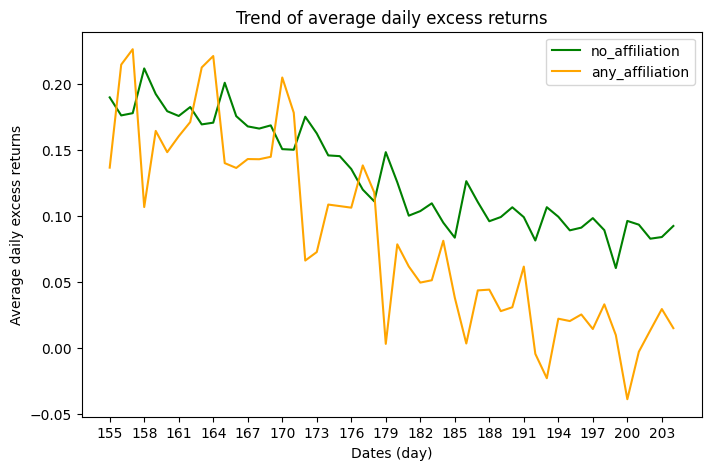

In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(155,205,1) , plt_df1.T[0], color='green',label='no_affiliation' )
plt.plot(range(155,205,1) , plt_df1.T[1], color='orange',label= "any_affiliation")

plt.legend()
plt.xlabel('Dates (day)')
plt.ylabel("Average daily excess returns")
plt.title('Trend of average daily excess returns')
plt.xticks(np.arange(155,205,3))

plt.show()

In [ ]:
 long_term_ret_list1=['l_ret_155', 'l_ret_156', 'l_ret_157', 'l_ret_158','l_ret_159', 'l_ret_160',
                      'l_ret_161', 'l_ret_162', 'l_ret_163','l_ret_164',

                      'l_ret_165', 'l_ret_166', 'l_ret_167', 'l_ret_168','l_ret_169', 'l_ret_170',
                      'l_ret_171', 'l_ret_172', 'l_ret_173','l_ret_174', 'l_ret_175',
                      'l_ret_176', 'l_ret_177', 'l_ret_178','l_ret_179', 'l_ret_180',
                      'l_ret_181', 'l_ret_182', 'l_ret_183','l_ret_184', 'l_ret_185',
                      'l_ret_186', 'l_ret_187', 'l_ret_188','l_ret_189', 'l_ret_190',
                      'l_ret_191', 'l_ret_192', 'l_ret_193','l_ret_194', 'l_ret_195',

                      'l_ret_196', 'l_ret_197', 'l_ret_198','l_ret_199', 'l_ret_200',
                      'l_ret_201', 'l_ret_202', 'l_ret_203','l_ret_204','udwr_any_aff_by_deal']

In [ ]:
# compare average returns in affil ipo and non affill ipo
plt_df2 = final_sdc_vd_regg_df[long_term_ret_list1].groupby('udwr_any_aff_by_deal').mean()
plt_df2

,l_ret_155,l_ret_156,l_ret_157,l_ret_158,l_ret_159,l_ret_160,l_ret_161,l_ret_162,l_ret_163,l_ret_164,...,l_ret_195,l_ret_196,l_ret_197,l_ret_198,l_ret_199,l_ret_200,l_ret_201,l_ret_202,l_ret_203,l_ret_204
udwr_any_aff_by_deal,,,,,,,,,,,,,,,,,,,,,
0,0.305248,0.289137,0.303453,0.337607,0.315051,0.302564,0.300956,0.303718,0.288872,0.305247,...,0.243850,0.247456,0.249283,0.237777,0.223145,0.260997,0.255088,0.244619,0.247355,0.251912
1,0.245914,0.327383,0.353413,0.242397,0.298110,0.277044,0.283372,0.286403,0.327549,0.339984,...,0.158691,0.160420,0.149976,0.161392,0.131318,0.105990,0.142475,0.156081,0.170561,0.156478


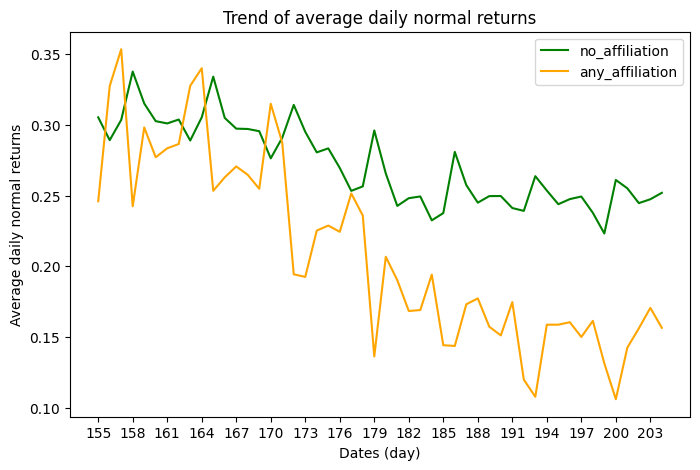

In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(155,205,1) , plt_df2.T[0], color='green',label='no_affiliation' )
plt.plot(range(155,205,1) , plt_df2.T[1], color='orange',label= "any_affiliation")

plt.legend()
plt.xlabel('Dates (day)')
plt.ylabel("Average daily normal returns")
plt.title('Trend of average daily normal returns')
plt.xticks(np.arange(155,205,3))

plt.show()

In [ ]:
# compare average returns in affil ipo and non affill ipo
plt_df3 = final_sdc_vd_regg_df[['excess_ret_1d', 'excess_ret_1w', 'excess_ret_1m', 'excess_ret_3m',
                                'excess_ret_155d', 'excess_ret_156d', 'excess_ret_157d',
                                'excess_ret_158d', 'excess_ret_159d', 'excess_ret_160d',
                                'excess_ret_161d', 'excess_ret_162d', 'excess_ret_163d',
                                'excess_ret_164d',
                                'excess_ret_165d', 'excess_ret_166d', 'excess_ret_167d',
                                'excess_ret_168d', 'excess_ret_169d', 'excess_ret_170d',
                                'excess_ret_171d', 'excess_ret_172d', 'excess_ret_173d',
                                'excess_ret_174d', 'excess_ret_175d', 'excess_ret_176d',
                                'excess_ret_177d', 'excess_ret_178d', 'excess_ret_179d', 'excess_ret_180d',
                                'excess_ret_181d', 'excess_ret_182d', 'excess_ret_183d',
                                'excess_ret_184d', 'excess_ret_185d', 'excess_ret_186d',
                                'excess_ret_187d', 'excess_ret_188d', 'excess_ret_189d', 'excess_ret_190d',
                                'excess_ret_191d', 'excess_ret_192d', 'excess_ret_193d',
                                'excess_ret_194d', 'excess_ret_195d',
                                'excess_ret_196d', 'excess_ret_197d', 'excess_ret_198d',
                                'excess_ret_199d', 'excess_ret_200d', 'excess_ret_201d',
                                'excess_ret_202d', 'excess_ret_203d', 'excess_ret_204d',
                                'excess_ret_1y', 'udwr_any_aff_by_deal']].groupby('udwr_any_aff_by_deal').mean()
plt_df3

,excess_ret_1d,excess_ret_1w,excess_ret_1m,excess_ret_3m,excess_ret_155d,excess_ret_156d,excess_ret_157d,excess_ret_158d,excess_ret_159d,excess_ret_160d,...,excess_ret_196d,excess_ret_197d,excess_ret_198d,excess_ret_199d,excess_ret_200d,excess_ret_201d,excess_ret_202d,excess_ret_203d,excess_ret_204d,excess_ret_1y
udwr_any_aff_by_deal,,,,,,,,,,,,,,,,,,,,,
0,0.261553,0.234240,0.260376,0.242420,0.189554,0.175901,0.177603,0.211470,0.192104,0.179096,...,0.090937,0.098140,0.089016,0.060327,0.096014,0.093184,0.082553,0.083813,0.092194,-0.110880
1,0.330653,0.328616,0.351766,0.314188,0.136356,0.214343,0.226019,0.106524,0.164177,0.148058,...,0.025180,0.014175,0.032854,0.009566,-0.038990,-0.003048,0.013235,0.029281,0.014814,-0.007796


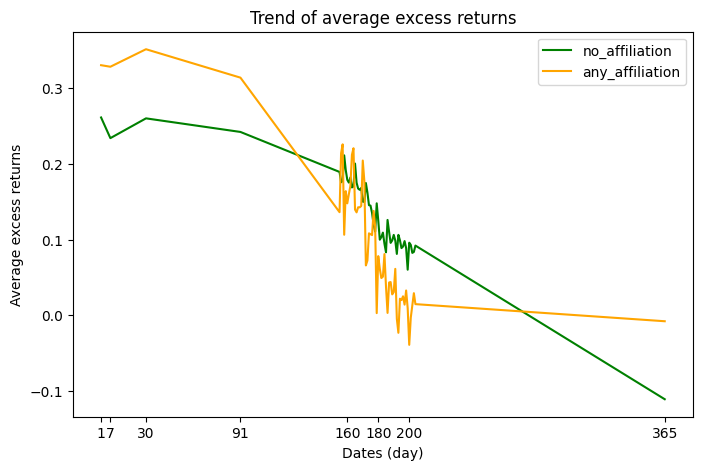

In [ ]:
date_range = [1,7,30,91] + list(range(155,205,1)) + [365]
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(date_range , plt_df3.T[0], color='green',label='no_affiliation' )
plt.plot(date_range , plt_df3.T[1], color='orange',label= "any_affiliation")


plt.legend()
plt.xlabel('Dates (day)')
plt.ylabel("Average excess returns")
plt.title('Trend of average excess returns')
plt.xticks([1,7,30,91, 160, 180, 200, 365])

plt.show()

In [ ]:
 long_term_ret_list2=['initial_return', 'l_ret_7', 'l_ret_30','l_ret_91',
                      'l_ret_155', 'l_ret_156', 'l_ret_157', 'l_ret_158','l_ret_159', 'l_ret_160',
                      'l_ret_161', 'l_ret_162', 'l_ret_163','l_ret_164',

                      'l_ret_165', 'l_ret_166', 'l_ret_167', 'l_ret_168','l_ret_169', 'l_ret_170',
                      'l_ret_171', 'l_ret_172', 'l_ret_173','l_ret_174', 'l_ret_175',
                      'l_ret_176', 'l_ret_177', 'l_ret_178','l_ret_179', 'l_ret_180',
                      'l_ret_181', 'l_ret_182', 'l_ret_183','l_ret_184', 'l_ret_185',
                      'l_ret_186', 'l_ret_187', 'l_ret_188','l_ret_189', 'l_ret_190',
                      'l_ret_191', 'l_ret_192', 'l_ret_193','l_ret_194', 'l_ret_195',

                      'l_ret_196', 'l_ret_197', 'l_ret_198','l_ret_199', 'l_ret_200',
                      'l_ret_201', 'l_ret_202', 'l_ret_203','l_ret_204','l_ret_365','udwr_any_aff_by_deal']

In [ ]:
# compare average returns in affil ipo and non affill ipo
plt_df4 = final_sdc_vd_regg_df[long_term_ret_list2].groupby('udwr_any_aff_by_deal').mean()
plt_df4

,initial_return,l_ret_7,l_ret_30,l_ret_91,l_ret_155,l_ret_156,l_ret_157,l_ret_158,l_ret_159,l_ret_160,...,l_ret_196,l_ret_197,l_ret_198,l_ret_199,l_ret_200,l_ret_201,l_ret_202,l_ret_203,l_ret_204,l_ret_365
udwr_any_aff_by_deal,,,,,,,,,,,,,,,,,,,,,
0,0.262149,0.279853,0.290782,0.334445,0.305248,0.289137,0.303453,0.337607,0.315051,0.302564,...,0.247456,0.249283,0.237777,0.223145,0.260997,0.255088,0.244619,0.247355,0.251912,0.178542
1,0.334053,0.340679,0.383818,0.384359,0.245914,0.327383,0.353413,0.242397,0.298110,0.277044,...,0.160420,0.149976,0.161392,0.131318,0.105990,0.142475,0.156081,0.170561,0.156478,0.203168


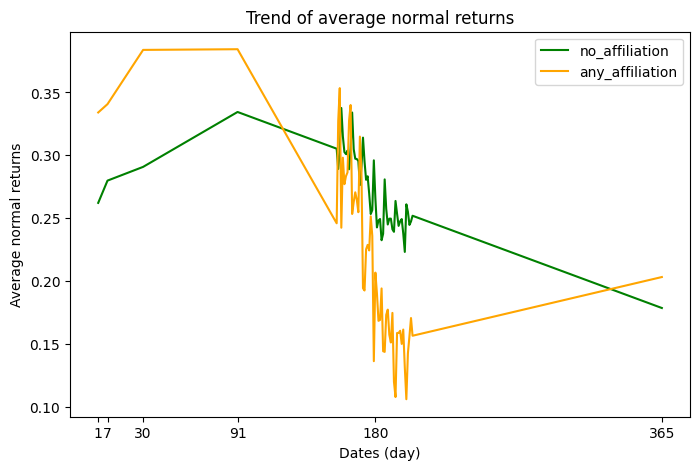

In [ ]:
date_range = [1,7,30,91] + list(range(155,205,1)) + [365]
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(date_range , plt_df4.T[0], color='green',label='no_affiliation' )
plt.plot(date_range , plt_df4.T[1], color='orange',label= "any_affiliation")

plt.legend()
plt.xlabel('Dates (day)')
plt.ylabel("Average normal returns")
plt.title('Trend of average normal returns')
plt.xticks([1,7,30,91, 180, 365])

plt.show()

In [ ]:
# compare average returns in affil ipo and non affill ipo
plt_df5 = final_sdc_vd_regg_df[['ind_ret_175', 'ind_ret_176', 'ind_ret_177', 'ind_ret_178',
                                'ind_ret_179', 'ind_ret_180', 'ind_ret_181', 'ind_ret_182',
                                'ind_ret_183', 'ind_ret_184', 'ind_ret_185', 'ind_ret_186',
                                'ind_ret_187', 'udwr_any_aff_by_deal']].groupby('udwr_any_aff_by_deal').mean()
plt_df5

,ind_ret_175,ind_ret_176,ind_ret_177,ind_ret_178,ind_ret_179,ind_ret_180,ind_ret_181,ind_ret_182,ind_ret_183,ind_ret_184,ind_ret_185,ind_ret_186,ind_ret_187
udwr_any_aff_by_deal,,,,,,,,,,,,,
0,0.179624,0.180123,0.166642,0.189219,0.196471,0.179021,0.179679,0.184954,0.185531,0.170558,0.187772,0.219245,0.185702
1,0.121514,0.099512,0.092173,0.084855,0.112903,0.123683,0.120237,0.101724,0.107164,0.087911,0.057352,0.124472,0.128130


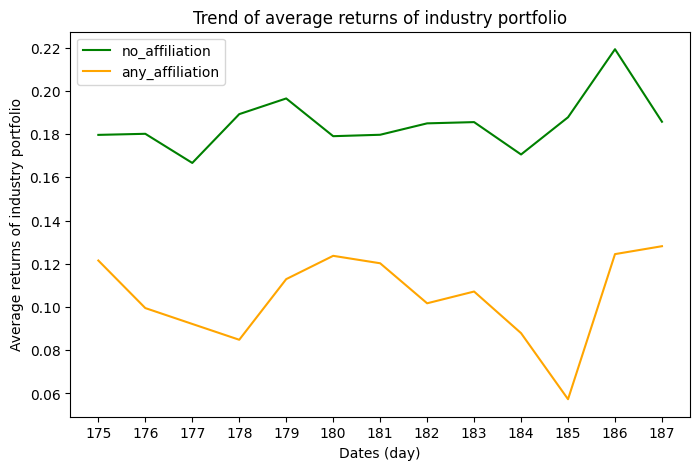

In [ ]:
date_range = [1,7,30,91] + list(range(175,188,1)) + [365]
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(175,188,1) , plt_df5.T[0], color='green',label='no_affiliation' )
plt.plot(range(175,188,1) , plt_df5.T[1], color='orange',label= "any_affiliation")

plt.legend()
plt.xlabel('Dates (day)')
plt.ylabel("Average returns of industry portfolio")
plt.title('Trend of average returns of industry portfolio')
plt.xticks(range(175,188,1))

plt.show()

## 2.2. Diff in Diff model

### Change the data to diff in diff data

In [ ]:
# data restore
final_sdc_vd_did_df =final_sdc_vd_regg_df.copy()

In [ ]:
# log firm size variable
final_sdc_vd_did_df['lg_firm_size_at_offer'] = winsorize(np.log2(final_sdc_vd_did_df['market_value_after_offer($_mil)_2022']),(0.01,0.01))

In [ ]:
# make functions
# pooled cross sectional data structure
final_sdc_vd_did_df.issue_year = pd.Categorical(final_sdc_vd_did_df.issue_year.astype(int))
final_sdc_vd_did_df.sic3 = pd.Categorical(final_sdc_vd_did_df.sic3)
# date formate
final_sdc_vd_did_df.issue_date = pd.to_datetime(final_sdc_vd_did_df.issue_date)
# set index for pannel
did_sdc_df1 = final_sdc_vd_did_df.set_index(["r_permno","issue_date"]).copy()

In [ ]:
# before 180 day(intervention) df
lead_any = 'udwr_any_aff_by_deal'

exog_vars = [lead_any,"float_rate2",'lg_firm_size_at_offer', 'issue_year','sic3','l_ret_175_180']
reg_sdc_did_df_b = did_sdc_df1[exog_vars].rename(columns={'l_ret_175_180':'did_ret_180'})
reg_sdc_did_df_b['after_180'] = 0
reg_sdc_did_df_b

,,udwr_any_aff_by_deal,float_rate2,lg_firm_size_at_offer,issue_year,sic3,did_ret_180,after_180
r_permno,issue_date,,,,,,,
81201.0,1995-01-10,0,0.500000,4.319087,1995,384,0.258333,0
81228.0,1995-01-12,0,0.368421,5.040869,1995,283,0.111607,0
81199.0,1995-01-18,0,0.127119,5.938619,1995,509,-0.222222,0
81212.0,1995-01-18,0,0.153374,5.819742,1995,737,0.500000,0
81230.0,1995-01-18,0,0.390625,4.471014,1995,737,0.225000,0
...,...,...,...,...,...,...,...,...
23514.0,2022-11-14,0,0.403727,4.319087,2022,283,NaN,0
23510.0,2022-11-14,0,0.046520,8.069853,2022,873,NaN,0
23622.0,2022-12-06,0,0.054612,6.364572,2022,509,NaN,0


In [ ]:
# after 180 day(intervention) df
exog_vars = [lead_any,"float_rate2",'lg_firm_size_at_offer', 'issue_year','sic3','l_ret_181_187']
reg_sdc_did_df_a = did_sdc_df1[exog_vars].rename(columns={'l_ret_181_187':'did_ret_180'})
reg_sdc_did_df_a['after_180'] = 1
reg_sdc_did_df_a

,,udwr_any_aff_by_deal,float_rate2,lg_firm_size_at_offer,issue_year,sic3,did_ret_180,after_180
r_permno,issue_date,,,,,,,
81201.0,1995-01-10,0,0.500000,4.319087,1995,384,0.257500,1
81228.0,1995-01-12,0,0.368421,5.040869,1995,283,0.096429,1
81199.0,1995-01-18,0,0.127119,5.938619,1995,509,-0.236111,1
81212.0,1995-01-18,0,0.153374,5.819742,1995,737,0.477500,1
81230.0,1995-01-18,0,0.390625,4.471014,1995,737,0.125000,1
...,...,...,...,...,...,...,...,...
23514.0,2022-11-14,0,0.403727,4.319087,2022,283,NaN,1
23510.0,2022-11-14,0,0.046520,8.069853,2022,873,NaN,1
23622.0,2022-12-06,0,0.054612,6.364572,2022,509,NaN,1


In [ ]:
# concat for diff in diff  data
did_df_l = pd.concat([reg_sdc_did_df_b,reg_sdc_did_df_a])
did_df_l

,,udwr_any_aff_by_deal,float_rate2,lg_firm_size_at_offer,issue_year,sic3,did_ret_180,after_180
r_permno,issue_date,,,,,,,
81201.0,1995-01-10,0,0.500000,4.319087,1995,384,0.258333,0
81228.0,1995-01-12,0,0.368421,5.040869,1995,283,0.111607,0
81199.0,1995-01-18,0,0.127119,5.938619,1995,509,-0.222222,0
81212.0,1995-01-18,0,0.153374,5.819742,1995,737,0.500000,0
81230.0,1995-01-18,0,0.390625,4.471014,1995,737,0.225000,0
...,...,...,...,...,...,...,...,...
23514.0,2022-11-14,0,0.403727,4.319087,2022,283,NaN,1
23510.0,2022-11-14,0,0.046520,8.069853,2022,873,NaN,1
23622.0,2022-12-06,0,0.054612,6.364572,2022,509,NaN,1


### Diff in Diff by mean differencing

In [ ]:
# compare groups means
result = did_df_l[['udwr_any_aff_by_deal','after_180','did_ret_180']].groupby(['udwr_any_aff_by_deal','after_180']).mean()
result2 =  result.unstack()
result2

did_ret_180          
after_180                      0         1
udwr_any_aff_by_deal                      
0                       0.271462  0.249619
1                       0.212456  0.171333

In [ ]:
# after 180 day return - before 180 day return
result2.iloc[1,1] - result2.iloc[1,0] - ( result2.iloc[0,1] - result2.iloc[0,0]  )

-0.01927954462645648

### Diff in Diff by interaction

#### normal  return.

l_ret_175_180 & l_ret_181_187

In [ ]:
model1 = 'did_ret_180 ~ udwr_any_aff_by_deal + after_180 + udwr_any_aff_by_deal * after_180'

In [ ]:
mod1 = smf.ols(formula=model1, data=did_df_l)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:            did_ret_180   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8902
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.445
Time:                        20:51:02   Log-Likelihood:                -15007.
No. Observations:               11082   AIC:                         3.002e+04
Df Residuals:                   11078   BIC:                         3.005e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
model2 = 'did_ret_180 ~ udwr_any_aff_by_deal + after_180 + udwr_any_aff_by_deal * after_180 + float_rate2 + lg_firm_size_at_offer + issue_year + sic3'

In [ ]:
mod2 = smf.ols(formula=model2, data=did_df_l)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:            did_ret_180   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     6.205
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.86e-202
Time:                        20:51:10   Log-Likelihood:                -12133.
No. Observations:                9665   AIC:                         2.488e+04
Df Residuals:                    9357   BIC:                         2.709e+04
Df Model:                         307                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
res2.params[-5:]

udwr_any_aff_by_deal             -0.074559
after_180                        -0.020195
udwr_any_aff_by_deal:after_180   -0.024768
float_rate2                      -0.492245
lg_firm_size_at_offer             0.026616
dtype: float64

In [ ]:
res2.params['udwr_any_aff_by_deal:after_180']

-0.024768036092972436

In [ ]:
res2.pvalues['udwr_any_aff_by_deal:after_180']

0.8416032857276436

In [ ]:
res2.tvalues['udwr_any_aff_by_deal:after_180']

-0.19984866106075422

In [ ]:
# save the results in pd dataframe
nom_did_df = model2df(res2).iloc[-5:,:].rename(columns={'coef':'normal_return'})
nom_did_df

,normal_return,P_value
udwr_any_aff_by_deal,-0.075,0.401
after_180,-0.02,0.255
udwr_any_aff_by_deal:after_180,-0.025,0.842
float_rate2,-0.492***,0.000
lg_firm_size_at_offer,0.027***,0.000


#### excess  return.

ex_ret_175_180 & ex_ret_181_187

In [ ]:
# data restore
final_sdc_vd_did_df =final_sdc_vd_regg_df.copy()

In [ ]:
# log firm size variable
final_sdc_vd_did_df['lg_firm_size_at_offer'] = winsorize(np.log2(final_sdc_vd_did_df['market_value_after_offer($_mil)_2022']),(0.01,0.01))

In [ ]:
# make functions
# pooled cross sectional data structure
final_sdc_vd_did_df.issue_year = pd.Categorical(final_sdc_vd_did_df.issue_year.astype(int))
final_sdc_vd_did_df.sic3 = pd.Categorical(final_sdc_vd_did_df.sic3)
# date formate
final_sdc_vd_did_df.issue_date = pd.to_datetime(final_sdc_vd_did_df.issue_date)
# set index for pannel
did_sdc_df2 = final_sdc_vd_did_df.set_index(["r_permno","issue_date"]).copy()

In [ ]:
# before 180 day(intervention) df
lead_any = 'udwr_any_aff_by_deal'

exog_vars = [lead_any,"float_rate2",'lg_firm_size_at_offer', 'issue_year','sic3','ex_ret_175_180']
reg_sdc_did_df_b = did_sdc_df2[exog_vars].rename(columns={'ex_ret_175_180':'did_ret_180'})
reg_sdc_did_df_b['after_180'] = 0
reg_sdc_did_df_b

,,udwr_any_aff_by_deal,float_rate2,lg_firm_size_at_offer,issue_year,sic3,did_ret_180,after_180
r_permno,issue_date,,,,,,,
81201.0,1995-01-10,0,0.500000,4.319087,1995,384,-0.079790,0
81228.0,1995-01-12,0,0.368421,5.040869,1995,283,-0.161941,0
81199.0,1995-01-18,0,0.127119,5.938619,1995,509,-0.620498,0
81212.0,1995-01-18,0,0.153374,5.819742,1995,737,0.070586,0
81230.0,1995-01-18,0,0.390625,4.471014,1995,737,-0.205039,0
...,...,...,...,...,...,...,...,...
23514.0,2022-11-14,0,0.403727,4.319087,2022,283,NaN,0
23510.0,2022-11-14,0,0.046520,8.069853,2022,873,NaN,0
23622.0,2022-12-06,0,0.054612,6.364572,2022,509,NaN,0


In [ ]:
# after 180 day(intervention) df
exog_vars = [lead_any,"float_rate2",'lg_firm_size_at_offer', 'issue_year','sic3','ex_ret_181_187']
reg_sdc_did_df_a = did_sdc_df2[exog_vars].rename(columns={'ex_ret_181_187':'did_ret_180'})
reg_sdc_did_df_a['after_180'] = 1
reg_sdc_did_df_a

,,udwr_any_aff_by_deal,float_rate2,lg_firm_size_at_offer,issue_year,sic3,did_ret_180,after_180
r_permno,issue_date,,,,,,,
81201.0,1995-01-10,0,0.500000,4.319087,1995,384,-0.081308,1
81228.0,1995-01-12,0,0.368421,5.040869,1995,283,-0.202519,1
81199.0,1995-01-18,0,0.127119,5.938619,1995,509,-0.606066,1
81212.0,1995-01-18,0,0.153374,5.819742,1995,737,0.093350,1
81230.0,1995-01-18,0,0.390625,4.471014,1995,737,-0.259755,1
...,...,...,...,...,...,...,...,...
23514.0,2022-11-14,0,0.403727,4.319087,2022,283,NaN,1
23510.0,2022-11-14,0,0.046520,8.069853,2022,873,NaN,1
23622.0,2022-12-06,0,0.054612,6.364572,2022,509,NaN,1


In [ ]:
# concat for diff in diff  data
did_df_ex = pd.concat([reg_sdc_did_df_b,reg_sdc_did_df_a])
did_df_ex

,,udwr_any_aff_by_deal,float_rate2,lg_firm_size_at_offer,issue_year,sic3,did_ret_180,after_180
r_permno,issue_date,,,,,,,
81201.0,1995-01-10,0,0.500000,4.319087,1995,384,-0.079790,0
81228.0,1995-01-12,0,0.368421,5.040869,1995,283,-0.161941,0
81199.0,1995-01-18,0,0.127119,5.938619,1995,509,-0.620498,0
81212.0,1995-01-18,0,0.153374,5.819742,1995,737,0.070586,0
81230.0,1995-01-18,0,0.390625,4.471014,1995,737,-0.205039,0
...,...,...,...,...,...,...,...,...
23514.0,2022-11-14,0,0.403727,4.319087,2022,283,NaN,1
23510.0,2022-11-14,0,0.046520,8.069853,2022,873,NaN,1
23622.0,2022-12-06,0,0.054612,6.364572,2022,509,NaN,1


In [ ]:
model3 = 'did_ret_180 ~ udwr_any_aff_by_deal + after_180 + udwr_any_aff_by_deal * after_180 + float_rate2 + lg_firm_size_at_offer'

In [ ]:
mod3 = smf.ols(formula=model3, data=did_df_ex)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:            did_ret_180   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     14.25
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           6.40e-14
Time:                        20:52:08   Log-Likelihood:                -11772.
No. Observations:                9211   AIC:                         2.356e+04
Df Residuals:                    9205   BIC:                         2.360e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
res3.params[-5:]

udwr_any_aff_by_deal             -0.083491
after_180                        -0.025512
udwr_any_aff_by_deal:after_180   -0.021217
float_rate2                      -0.469336
lg_firm_size_at_offer             0.016246
dtype: float64

In [ ]:
res3.pvalues[-5:]

udwr_any_aff_by_deal              0.345262
after_180                         0.163414
udwr_any_aff_by_deal:after_180    0.865052
float_rate2                       0.000217
lg_firm_size_at_offer             0.007779
dtype: float64

In [ ]:
# save the results in pd dataframe
ex_did_df = model2df(res3).iloc[-5:,:].rename(columns={'coef':'excess_return'})
ex_did_df

,excess_return,P_value
udwr_any_aff_by_deal,-0.083,0.345
after_180,-0.026,0.163
udwr_any_aff_by_deal:after_180,-0.021,0.865
float_rate2,-0.469***,0.000
lg_firm_size_at_offer,0.016***,0.008


#### excess  return.

ex_ret_3m & ex_ret_181_187

In [ ]:
# data restore
final_sdc_vd_did_df =final_sdc_vd_regg_df.copy()

In [ ]:
# log firm size variable
final_sdc_vd_did_df['lg_firm_size_at_offer'] = winsorize(np.log2(final_sdc_vd_did_df['market_value_after_offer($_mil)_2022']),(0.01,0.01))

In [ ]:
# make functions
# pooled cross sectional data structure
final_sdc_vd_did_df.issue_year = pd.Categorical(final_sdc_vd_did_df.issue_year.astype(int))
final_sdc_vd_did_df.sic3 = pd.Categorical(final_sdc_vd_did_df.sic3)
# date formate
final_sdc_vd_did_df.issue_date = pd.to_datetime(final_sdc_vd_did_df.issue_date)
# set index for pannel
did_sdc_df2 = final_sdc_vd_did_df.set_index(["r_permno","issue_date"]).copy()

In [ ]:
# before 180 day(intervention) df
lead_any = 'udwr_any_aff_by_deal'

exog_vars = [lead_any,"float_rate2",'lg_firm_size_at_offer', 'issue_year','sic3','excess_ret_3m']
reg_sdc_did_df_b = did_sdc_df2[exog_vars].rename(columns={'excess_ret_3m':'did_ret'})
reg_sdc_did_df_b['after_180'] = 0
reg_sdc_did_df_b

,,udwr_any_aff_by_deal,float_rate2,lg_firm_size_at_offer,issue_year,sic3,did_ret,after_180
r_permno,issue_date,,,,,,,
81201.0,1995-01-10,0,0.500000,4.319087,1995,384,-0.075506,0
81228.0,1995-01-12,0,0.368421,5.040869,1995,283,-0.081067,0
81199.0,1995-01-18,0,0.127119,5.938619,1995,509,-0.127240,0
81212.0,1995-01-18,0,0.153374,5.819742,1995,737,0.312223,0
81230.0,1995-01-18,0,0.390625,4.471014,1995,737,-0.413263,0
...,...,...,...,...,...,...,...,...
23514.0,2022-11-14,0,0.403727,4.319087,2022,283,NaN,0
23510.0,2022-11-14,0,0.046520,8.069853,2022,873,NaN,0
23622.0,2022-12-06,0,0.054612,6.364572,2022,509,NaN,0


In [ ]:
# after 180 day(intervention) df
exog_vars = [lead_any,"float_rate2",'lg_firm_size_at_offer', 'issue_year','sic3','ex_ret_181_187']
reg_sdc_did_df_a = did_sdc_df2[exog_vars].rename(columns={'ex_ret_181_187':'did_ret'})
reg_sdc_did_df_a['after_180'] = 1
reg_sdc_did_df_a

,,udwr_any_aff_by_deal,float_rate2,lg_firm_size_at_offer,issue_year,sic3,did_ret,after_180
r_permno,issue_date,,,,,,,
81201.0,1995-01-10,0,0.500000,4.319087,1995,384,-0.081308,1
81228.0,1995-01-12,0,0.368421,5.040869,1995,283,-0.202519,1
81199.0,1995-01-18,0,0.127119,5.938619,1995,509,-0.606066,1
81212.0,1995-01-18,0,0.153374,5.819742,1995,737,0.093350,1
81230.0,1995-01-18,0,0.390625,4.471014,1995,737,-0.259755,1
...,...,...,...,...,...,...,...,...
23514.0,2022-11-14,0,0.403727,4.319087,2022,283,NaN,1
23510.0,2022-11-14,0,0.046520,8.069853,2022,873,NaN,1
23622.0,2022-12-06,0,0.054612,6.364572,2022,509,NaN,1


In [ ]:
# concat for diff in diff  data
did_df_ex = pd.concat([reg_sdc_did_df_b,reg_sdc_did_df_a])
did_df_ex

,,udwr_any_aff_by_deal,float_rate2,lg_firm_size_at_offer,issue_year,sic3,did_ret,after_180
r_permno,issue_date,,,,,,,
81201.0,1995-01-10,0,0.500000,4.319087,1995,384,-0.075506,0
81228.0,1995-01-12,0,0.368421,5.040869,1995,283,-0.081067,0
81199.0,1995-01-18,0,0.127119,5.938619,1995,509,-0.127240,0
81212.0,1995-01-18,0,0.153374,5.819742,1995,737,0.312223,0
81230.0,1995-01-18,0,0.390625,4.471014,1995,737,-0.413263,0
...,...,...,...,...,...,...,...,...
23514.0,2022-11-14,0,0.403727,4.319087,2022,283,NaN,1
23510.0,2022-11-14,0,0.046520,8.069853,2022,873,NaN,1
23622.0,2022-12-06,0,0.054612,6.364572,2022,509,NaN,1


In [ ]:
model4 = 'did_ret ~ udwr_any_aff_by_deal + after_180 + udwr_any_aff_by_deal * after_180 + float_rate2 + lg_firm_size_at_offer'

In [ ]:
mod4 = smf.ols(formula=model4, data=did_df_ex)
res4 = mod4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                did_ret   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     31.73
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.69e-32
Time:                        20:53:29   Log-Likelihood:                -11739.
No. Observations:                9231   AIC:                         2.349e+04
Df Residuals:                    9225   BIC:                         2.353e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
res4.params[-5:]

udwr_any_aff_by_deal              0.001897
after_180                        -0.142355
udwr_any_aff_by_deal:after_180   -0.105992
float_rate2                      -0.466541
lg_firm_size_at_offer             0.022801
dtype: float64

In [ ]:
res4.pvalues[-5:].round(3)

udwr_any_aff_by_deal              0.983
after_180                         0.000
udwr_any_aff_by_deal:after_180    0.396
float_rate2                       0.000
lg_firm_size_at_offer             0.000
dtype: float64

In [ ]:
# save the results in pd dataframe
ex_did_df2 = model2df(res4).iloc[-5:,:].rename(columns={'coef':'excess_return_3m_6m'})
ex_did_df2

,excess_return_3m_6m,P_value
udwr_any_aff_by_deal,0.002,0.983
after_180,-0.142***,0.000
udwr_any_aff_by_deal:after_180,-0.115,0.355
float_rate2,-0.451***,0.000
lg_firm_size_at_offer,0.023***,0.000


In [ ]:
model2df(res4).iloc[-5:,:]

,coef,P_value
udwr_any_aff_by_deal,0.002,0.983
after_180,-0.142***,0.000
udwr_any_aff_by_deal:after_180,-0.115,0.355
float_rate2,-0.451***,0.000
lg_firm_size_at_offer,0.023***,0.000


In [ ]:
# save the results in pd dataframe
ex_did_df2 = model2df(res4).iloc[-5:,:].rename(columns={'coef':'excess_return_3m_6m'})
ex_did_df2

,excess_return_3m_6m,P_value
udwr_any_aff_by_deal,0.002,0.983
after_180,-0.142***,0.000
udwr_any_aff_by_deal:after_180,-0.115,0.355
float_rate2,-0.451***,0.000
lg_firm_size_at_offer,0.023***,0.000


#### excess  return.

ex_ret_3m & ex_ret_181_187

In [ ]:
# data restore
final_sdc_vd_did_df =final_sdc_vd_regg_df.copy()

In [ ]:
# log firm size variable
final_sdc_vd_did_df['lg_firm_size_at_offer'] = winsorize(np.log2(final_sdc_vd_did_df['market_value_after_offer($_mil)_2022']),(0.01,0.01))

In [ ]:
# make functions
# pooled cross sectional data structure
final_sdc_vd_did_df.issue_year = pd.Categorical(final_sdc_vd_did_df.issue_year.astype(int))
final_sdc_vd_did_df.sic3 = pd.Categorical(final_sdc_vd_did_df.sic3)
# date formate
final_sdc_vd_did_df.issue_date = pd.to_datetime(final_sdc_vd_did_df.issue_date)
# set index for pannel
did_sdc_df2 = final_sdc_vd_did_df.set_index(["r_permno","issue_date"]).copy()

In [ ]:
# before 180 day(intervention) df
lead_any = 'udwr_any_aff_by_deal'

exog_vars = [lead_any,"float_rate2",'lg_firm_size_at_offer', 'issue_year','sic3','ex_ret_160_170']
reg_sdc_did_df_b = did_sdc_df2[exog_vars].rename(columns={'ex_ret_160_170':'did_ret'})
reg_sdc_did_df_b['after_180'] = 0
reg_sdc_did_df_b

,,udwr_any_aff_by_deal,float_rate2,lg_firm_size_at_offer,issue_year,sic3,did_ret,after_180
r_permno,issue_date,,,,,,,
81201.0,1995-01-10,0,0.500000,4.319087,1995,384,-0.066574,0
81228.0,1995-01-12,0,0.368421,5.040869,1995,283,-0.159646,0
81199.0,1995-01-18,0,0.127119,5.938619,1995,509,-0.548474,0
81212.0,1995-01-18,0,0.153374,5.819742,1995,737,0.239864,0
81230.0,1995-01-18,0,0.390625,4.471014,1995,737,-0.076339,0
...,...,...,...,...,...,...,...,...
23514.0,2022-11-14,0,0.403727,4.319087,2022,283,NaN,0
23510.0,2022-11-14,0,0.046520,8.069853,2022,873,NaN,0
23622.0,2022-12-06,0,0.054612,6.364572,2022,509,NaN,0


In [ ]:
# after 180 day(intervention) df
exog_vars = [lead_any,"float_rate2",'lg_firm_size_at_offer', 'issue_year','sic3','ex_ret_190_200']
reg_sdc_did_df_a = did_sdc_df2[exog_vars].rename(columns={'ex_ret_190_200':'did_ret'})
reg_sdc_did_df_a['after_180'] = 1
reg_sdc_did_df_a

,,udwr_any_aff_by_deal,float_rate2,lg_firm_size_at_offer,issue_year,sic3,did_ret,after_180
r_permno,issue_date,,,,,,,
81201.0,1995-01-10,0,0.500000,4.319087,1995,384,-0.079213,1
81228.0,1995-01-12,0,0.368421,5.040869,1995,283,-0.251689,1
81199.0,1995-01-18,0,0.127119,5.938619,1995,509,-0.674720,1
81212.0,1995-01-18,0,0.153374,5.819742,1995,737,0.064772,1
81230.0,1995-01-18,0,0.390625,4.471014,1995,737,-0.053706,1
...,...,...,...,...,...,...,...,...
23514.0,2022-11-14,0,0.403727,4.319087,2022,283,NaN,1
23510.0,2022-11-14,0,0.046520,8.069853,2022,873,NaN,1
23622.0,2022-12-06,0,0.054612,6.364572,2022,509,NaN,1


In [ ]:
# concat for diff in diff  data
did_df_ex = pd.concat([reg_sdc_did_df_b,reg_sdc_did_df_a])
did_df_ex

,,udwr_any_aff_by_deal,float_rate2,lg_firm_size_at_offer,issue_year,sic3,did_ret,after_180
r_permno,issue_date,,,,,,,
81201.0,1995-01-10,0,0.500000,4.319087,1995,384,-0.066574,0
81228.0,1995-01-12,0,0.368421,5.040869,1995,283,-0.159646,0
81199.0,1995-01-18,0,0.127119,5.938619,1995,509,-0.548474,0
81212.0,1995-01-18,0,0.153374,5.819742,1995,737,0.239864,0
81230.0,1995-01-18,0,0.390625,4.471014,1995,737,-0.076339,0
...,...,...,...,...,...,...,...,...
23514.0,2022-11-14,0,0.403727,4.319087,2022,283,NaN,1
23510.0,2022-11-14,0,0.046520,8.069853,2022,873,NaN,1
23622.0,2022-12-06,0,0.054612,6.364572,2022,509,NaN,1


In [ ]:
model5 = 'did_ret ~ udwr_any_aff_by_deal + after_180 + udwr_any_aff_by_deal * after_180 + float_rate2 + lg_firm_size_at_offer'

In [ ]:
mod5 = smf.ols(formula=model5, data=did_df_ex)
res5 = mod5.fit()
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:                did_ret   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     17.43
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.22e-17
Time:                        20:57:27   Log-Likelihood:                -12102.
No. Observations:                9213   AIC:                         2.422e+04
Df Residuals:                    9207   BIC:                         2.426e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
res5.params[-5:]

udwr_any_aff_by_deal             -0.064190
after_180                        -0.076671
udwr_any_aff_by_deal:after_180   -0.059335
float_rate2                      -0.485480
lg_firm_size_at_offer             0.017087
dtype: float64

In [ ]:
res5.pvalues[-5:].round(3)

udwr_any_aff_by_deal              0.484
after_180                         0.000
udwr_any_aff_by_deal:after_180    0.646
float_rate2                       0.000
lg_firm_size_at_offer             0.007
dtype: float64

In [ ]:
# save the results in pd dataframe
ex_did_df3 = model2df(res5).iloc[-5:,:].rename(columns={'coef':'ex_ret_165_195'}).rename(columns={'ex_ret_160170_190200':'ex_ret_165_195'})
ex_did_df3

,ex_ret_165_195,P_value
udwr_any_aff_by_deal,-0.064,0.484
after_180,-0.077***,0.000
udwr_any_aff_by_deal:after_180,-0.059,0.646
float_rate2,-0.485***,0.000
lg_firm_size_at_offer,0.017***,0.007


In [ ]:
model2df(res5).iloc[-5:,:]

,coef,P_value
udwr_any_aff_by_deal,-0.064,0.484
after_180,-0.077***,0.000
udwr_any_aff_by_deal:after_180,-0.059,0.646
float_rate2,-0.485***,0.000
lg_firm_size_at_offer,0.017***,0.007


#### results

In [ ]:
did_result1 = pd.concat([nom_did_df.normal_return, ex_did_df.excess_return,ex_did_df3.ex_ret_165_195, ex_did_df2.excess_return_3m_6m],axis=1)
did_result1

,normal_return,excess_return,ex_ret_165_195,excess_return_3m_6m
udwr_any_aff_by_deal,-0.075,-0.083,-0.064,0.002
after_180,-0.02,-0.026,-0.077***,-0.142***
udwr_any_aff_by_deal:after_180,-0.025,-0.021,-0.059,-0.115
float_rate2,-0.492***,-0.469***,-0.485***,-0.451***
lg_firm_size_at_offer,0.027***,0.016***,0.017***,0.023***


In [ ]:
did_result1 = pd.concat([nom_did_df, ex_did_df, ex_did_df2],axis=1)
did_result1

,normal_return,excess_return,excess_return_3m_6m
udwr_any_aff_by_deal,-0.075,-0.067,0.002
after_180,-0.02,-0.025,-0.142***
udwr_any_aff_by_deal:after_180,-0.025,-0.028,-0.106
float_rate2,-0.492***,-0.493***,-0.467***
lg_firm_size_at_offer,0.027***,0.015**,0.023***


In [ ]:
did_result1.to_latex()

<ipython-input-368-a7e5739688c6>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  did_result1.to_latex()


'\\begin{tabular}{lllll}\n\\toprule\n{} & normal\\_return & excess\\_return & ex\\_ret\\_165\\_195 & excess\\_return\\_3m\\_6m \\\\\n\\midrule\nudwr\\_any\\_aff\\_by\\_deal           &        -0.075 &        -0.083 &         -0.064 &               0.002 \\\\\nafter\\_180                      &         -0.02 &        -0.026 &      -0.077*** &           -0.142*** \\\\\nudwr\\_any\\_aff\\_by\\_deal:after\\_180 &        -0.025 &        -0.021 &         -0.059 &              -0.115 \\\\\nfloat\\_rate2                    &     -0.492*** &     -0.469*** &      -0.485*** &           -0.451*** \\\\\nlg\\_firm\\_size\\_at\\_offer          &      0.027*** &      0.016*** &       0.017*** &            0.023*** \\\\\n\\bottomrule\n\\end{tabular}\n'